### Benchmarking based on PXD005486

#### The data contains 12 human proteins and a bovin protein spiked into an E Coli background using various known concentrations, it employed multiplexed labeling using tandem mass tags (TMT), where multiple samples are quantitated simultaneously using isobaric tags. Proteins were spiked twice using the same concentration indifferent channels and only once for the two highest concentrations. Therefore, only a single, or two replicate measurements at maximum are available when comparing two concentrations.  A total of 12 peptide fractions were prepared.

In [1]:
%load_ext rpy2.ipython

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
%%R
data_folder = '../../datasets/TMT/PXD005486'
setwd(data_folder)

In [4]:
# preprocess out_msstats.csv
import gzip

path = "out_msstats.csv.gz"
f_name = path.replace(".gz", "")
g_file = gzip.GzipFile(path)
with open(f_name, "wb+") as f:
    f.write(g_file.read())

In [4]:
quantms = pd.read_csv("./out_msstats.csv", sep=',', header=0)
quantms = quantms[-quantms['ProteinName'].str.contains("DECOY_")]
print(len(set(quantms['ProteinName'])))
quantms.head()

2391


,RetentionTime,ProteinName,PeptideSequence,Charge,Channel,Condition,BioReplicate,Run,Mixture,TechRepMixture,Fraction,Intensity,Reference
0,1576.384729,sp|P0A6P9|ENO_ECOLI,.(TMT6plex)AAAAAK(TMT6plex),2,6,control|CT=protein;AC=ENO1;QY=1 pmol|CT=protei...,6,1_1_10,1,1_1,10,84206.68,151107_Ecoli_12prot_spike_MS2_Fr10.mzML_contro...
1,1576.384729,sp|P0A6P9|ENO_ECOLI,.(TMT6plex)AAAAAK(TMT6plex),2,9,control|CT=protein;AC=ENO1;QY=1 pmol|CT=protei...,9,1_1_10,1,1_1,10,84253.47,151107_Ecoli_12prot_spike_MS2_Fr10.mzML_contro...
2,1576.384729,sp|P0A6P9|ENO_ECOLI,.(TMT6plex)AAAAAK(TMT6plex),2,10,control|CT=protein;AC=ENO1;QY=4 pmol|CT=protei...,10,1_1_10,1,1_1,10,104447.00,151107_Ecoli_12prot_spike_MS2_Fr10.mzML_contro...
3,1576.384729,sp|P0A6P9|ENO_ECOLI,.(TMT6plex)AAAAAK(TMT6plex),2,7,control|CT=protein;AC=ENO1;QY=4 pmol|CT=protei...,7,1_1_10,1,1_1,10,94212.23,151107_Ecoli_12prot_spike_MS2_Fr10.mzML_contro...
4,1576.384729,sp|P0A6P9|ENO_ECOLI,.(TMT6plex)AAAAAK(TMT6plex),2,8,control|CT=protein;AC=ENO1;QY=40 pmol|CT=prote...,8,1_1_10,1,1_1,10,102416.80,151107_Ecoli_12prot_spike_MS2_Fr10.mzML_contro...


From cffi callback <function _consolewrite_ex at 0x0000013D2C2E9798>:
Traceback (most recent call last):
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd4 in position 1: invalid continuation byte
R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




INFO  [2022-01-21 14:49:13] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 14:49:16] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 14:49:16] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 14:49:17] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 14:49:17] ** Shared peptides are removed.
INFO  [2022-01-21 14:49:17] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 14:49:59] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 14:50:05] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 14:50:05] ** Fractions belongin

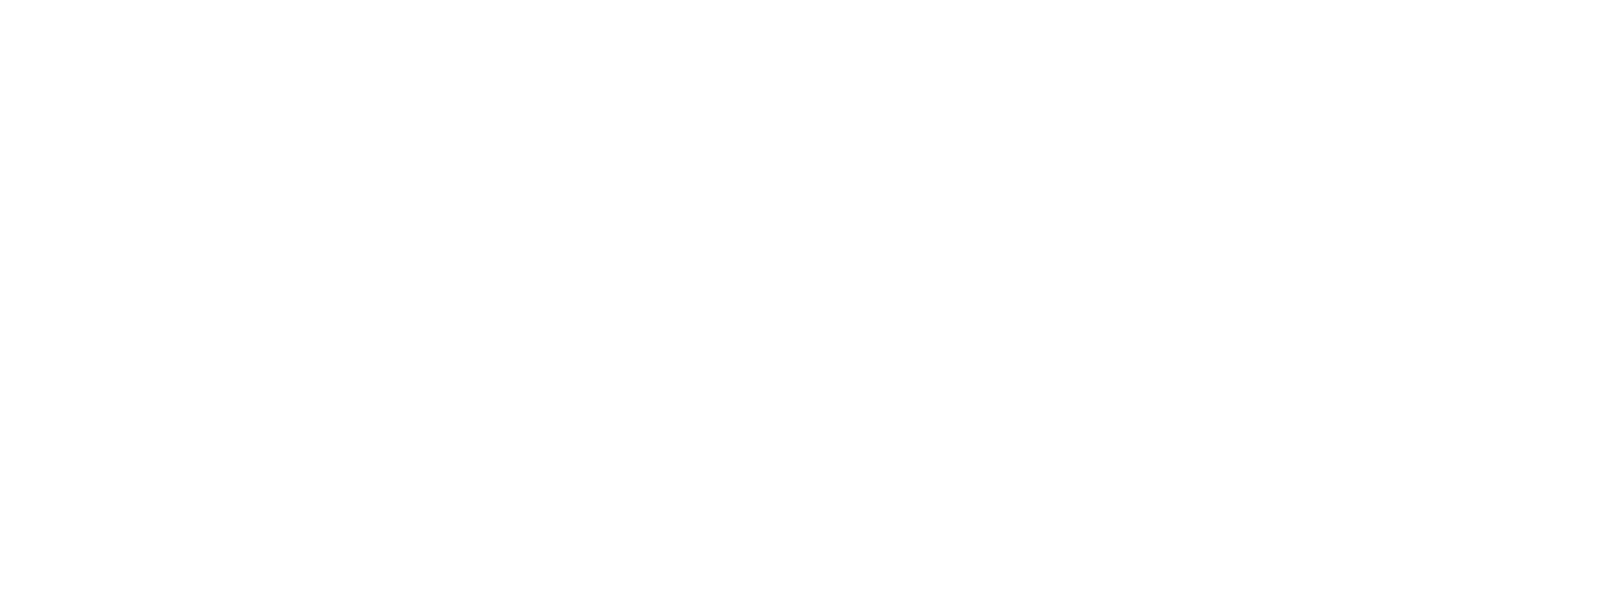

In [6]:
%%R -w 1600 -h 600

library('MSstatsTMT', warn.conflicts = F, quietly = T, verbose = F)
library("dplyr")

openms_output = './out_msstats.csv'
raw.om = read.csv(openms_output, header = TRUE, sep = ',')
raw.om = raw.om[!grepl("DECOY", raw.om$ProteinName),]
input.om <- OpenMStoMSstatsTMTFormat(raw.om)

INFO  [2022-01-21 14:50:27] ** MSstatsTMT - proteinSummarization function
INFO  [2022-01-21 14:50:27] Summarizing for Run : 1_1_1 ( 1  of  1 )
  |======================================================================| 100%
INFO  [2022-01-21 14:51:39] ** Protein-level summarization done by MSstats.


R[write to console]: Drew the Profile plot for 1 proteins.



  |======================================================================| 100%


R[write to console]: Drew the Profile plot with summarization for 1 proteins.



  |======================================================================| 100%


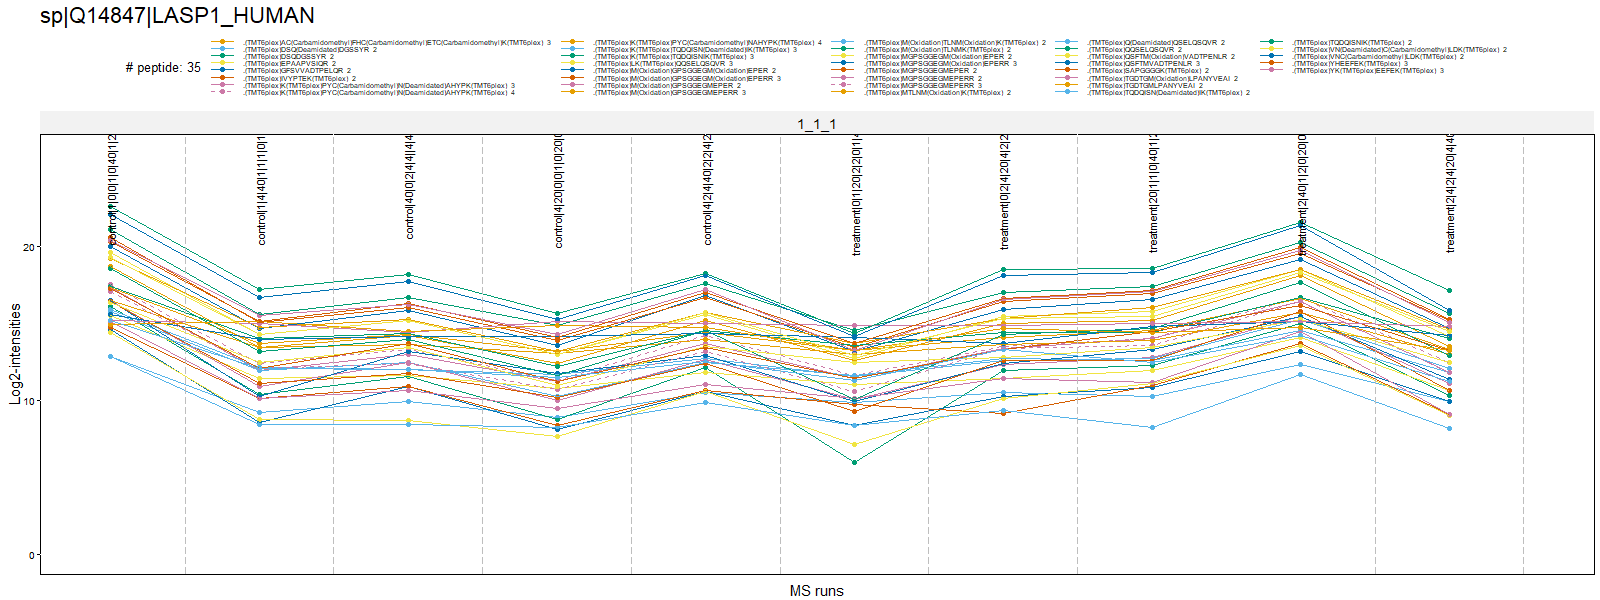

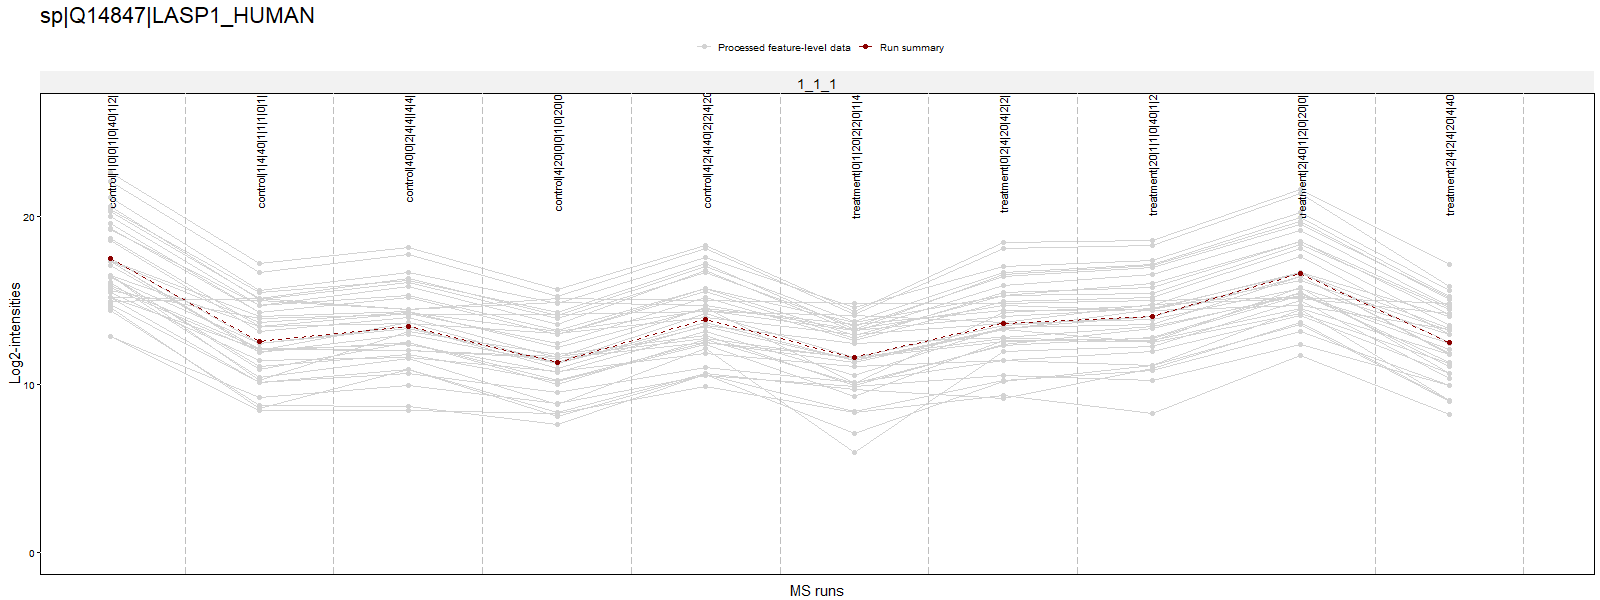

In [7]:
%%R -w 1600 -h 600


input.om$Condition = data.frame(input.om)%>%select(Condition)%>%
    mutate(Condition=case_when(input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"control|1|0|0|1|0|40|1|2|2|0|40|4|21",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"control|4|20|0|0|1|0|20|0|1|40|2|2|64",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"control|40|0|2|4|4||4|4|1|2|2|20|1",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"control|1|4|40|1|1|1|0|1|40|1|0|1|79",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"control|4|2|4|40|2|2|4|20|1|4|4|0|81",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"treatment|0|2|4|20|4|2|2|4|2|2|4|40|5",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"treatment|20|1|1|0|40|1|2|0|20|0|1|1|0",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"treatment|2|40|1|2|0|20|0|2|0|1|20|4|32",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"treatment|0|1|20|2|2|0|1|40|0|20|1|0|85",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"treatment|2|4|2|4|20|4|40|4|4|4|0|2|12"))


# use MSstatsTMT for protein summarization
quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

## Profile plot without norm channnels and empty channels
dataProcessPlotsTMT(data=quant_om.msstats,
                     type = 'ProfilePlot',
                     which.Protein = 'sp|Q14847|LASP1_HUMAN',  # spiked-in protein
                     width = 25, # adjust the figure width 
                     height = 12,
                     address=FALSE)

In [8]:
%%R
head(quant_om.msstats$ProteinLevelData)
write.csv(quant_om.msstats$ProteinLevelData, "ProteinLevelData.csv", row.names=FALSE, col.names=TRUE,sep=",")

### The fold changes of E.coli background proteins

#### Similar to theoriginal study, we assigned thefirstfive channels to onetreatment group, and the secondfive channels to the secondgroup. As expected, no proteins were identified as beingsignificantly regulated. The estimated log-fold changes of theE.colibackground proteins were all close to 0.

#### other five. The estimated log-fold changes are most closely centered around 0. As expected, no proteins were identified as being significantly regulated (Based on log2FC and pvalue or FDR 0.05).

In [9]:
%%R

input.om$Condition = data.frame(input.om)%>%select(Condition)%>%
    mutate(Condition=case_when(input.om$Condition == "control|1|0|0|1|0|40|1|2|2|0|40|4|21"~"control",
        input.om$Condition == "control|4|20|0|0|1|0|20|0|1|40|2|2|64"~"control",
        input.om$Condition == "control|40|0|2|4|4||4|4|1|2|2|20|1"~"control",
        input.om$Condition == "control|1|4|40|1|1|1|0|1|40|1|0|1|79"~"control",
        input.om$Condition == "control|4|2|4|40|2|2|4|20|1|4|4|0|81"~"control",
        input.om$Condition == "treatment|0|2|4|20|4|2|2|4|2|2|4|40|5"~"treatment",
        input.om$Condition == "treatment|20|1|1|0|40|1|2|0|20|0|1|1|0"~"treatment",
        input.om$Condition == "treatment|2|40|1|2|0|20|0|2|0|1|20|4|32"~"treatment",
        input.om$Condition == "treatment|0|1|20|2|2|0|1|40|0|20|1|0|85"~"treatment",
        input.om$Condition == "treatment|2|4|2|4|20|4|40|4|4|4|0|2|12"~"treatment"))



quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

levels(quant_om.msstats$ProteinLevelData$Condition)

INFO  [2022-01-21 14:52:22] ** MSstatsTMT - proteinSummarization function
INFO  [2022-01-21 14:52:22] Summarizing for Run : 1_1_1 ( 1  of  1 )
  |======================================================================| 100%
INFO  [2022-01-21 14:53:34] ** Protein-level summarization done by MSstats.
[1] "control"   "treatment"


In [10]:
%%R -w 1000 -h 600

TMT_Comp<-matrix(c(-1, 1), nrow=1)
row.names(TMT_Comp)<-c("treatment vs control")
colnames(TMT_Comp) = c("control","treatment")


TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

head(TMT_Comp.pairwise$ComparisonResult)

INFO  [2022-01-21 14:55:01] Model fitting for 2391 proteins.
  |======================================================================| 100%
INFO  [2022-01-21 14:55:20] Testing for 2391 proteins:
  |======================================================================| 100%
                 Protein                Label       log2FC         SE       DF
1: sp|O15379|HDAC3_HUMAN treatment vs control -0.048550603 0.88201089 10.83695
2:  sp|O60861|GAS7_HUMAN treatment vs control -0.446198538 0.93875899 10.83695
3:  sp|P00350|6PGD_ECOLI treatment vs control  0.002888914 0.03027785 10.83695
4:  sp|P00363|FRDA_ECOLI treatment vs control  0.053176635 0.03386556 10.83695
5:  sp|P00370|DHE4_ECOLI treatment vs control  0.017442920 0.02846753 10.83695
6:   sp|P00393|NDH_ECOLI treatment vs control  0.035354296 0.03942897 10.83695
      pvalue adj.pvalue issue
1: 0.9571040  0.9994029    NA
2: 0.6440041  0.9708686    NA
3: 0.9257279  0.9984271    NA
4: 0.1450800  0.9708686    NA
5: 0.5526954  0.97086

In [46]:
%%R

viodata = TMT_Comp.pairwise$ComparisonResult[ grep("ENOA_HUMAN|ARGI1_HUMAN|FABP4_HUMAN|TEBP_HUMAN|IMA1_HUMAN|LASP1_HUAMN|HDAC3_HUMAN|CSEN_HUMAN|OTUB1_HUMAN|GBRL1_HUMAN|GAS7_HUMAN|EZRI_HUMAN|ALBU_BOVIN",TMT_Comp.pairwise$ComparisonResult$Protein, invert = TRUE), ]

R[write to console]: Saving 6.67 x 6.67 in image



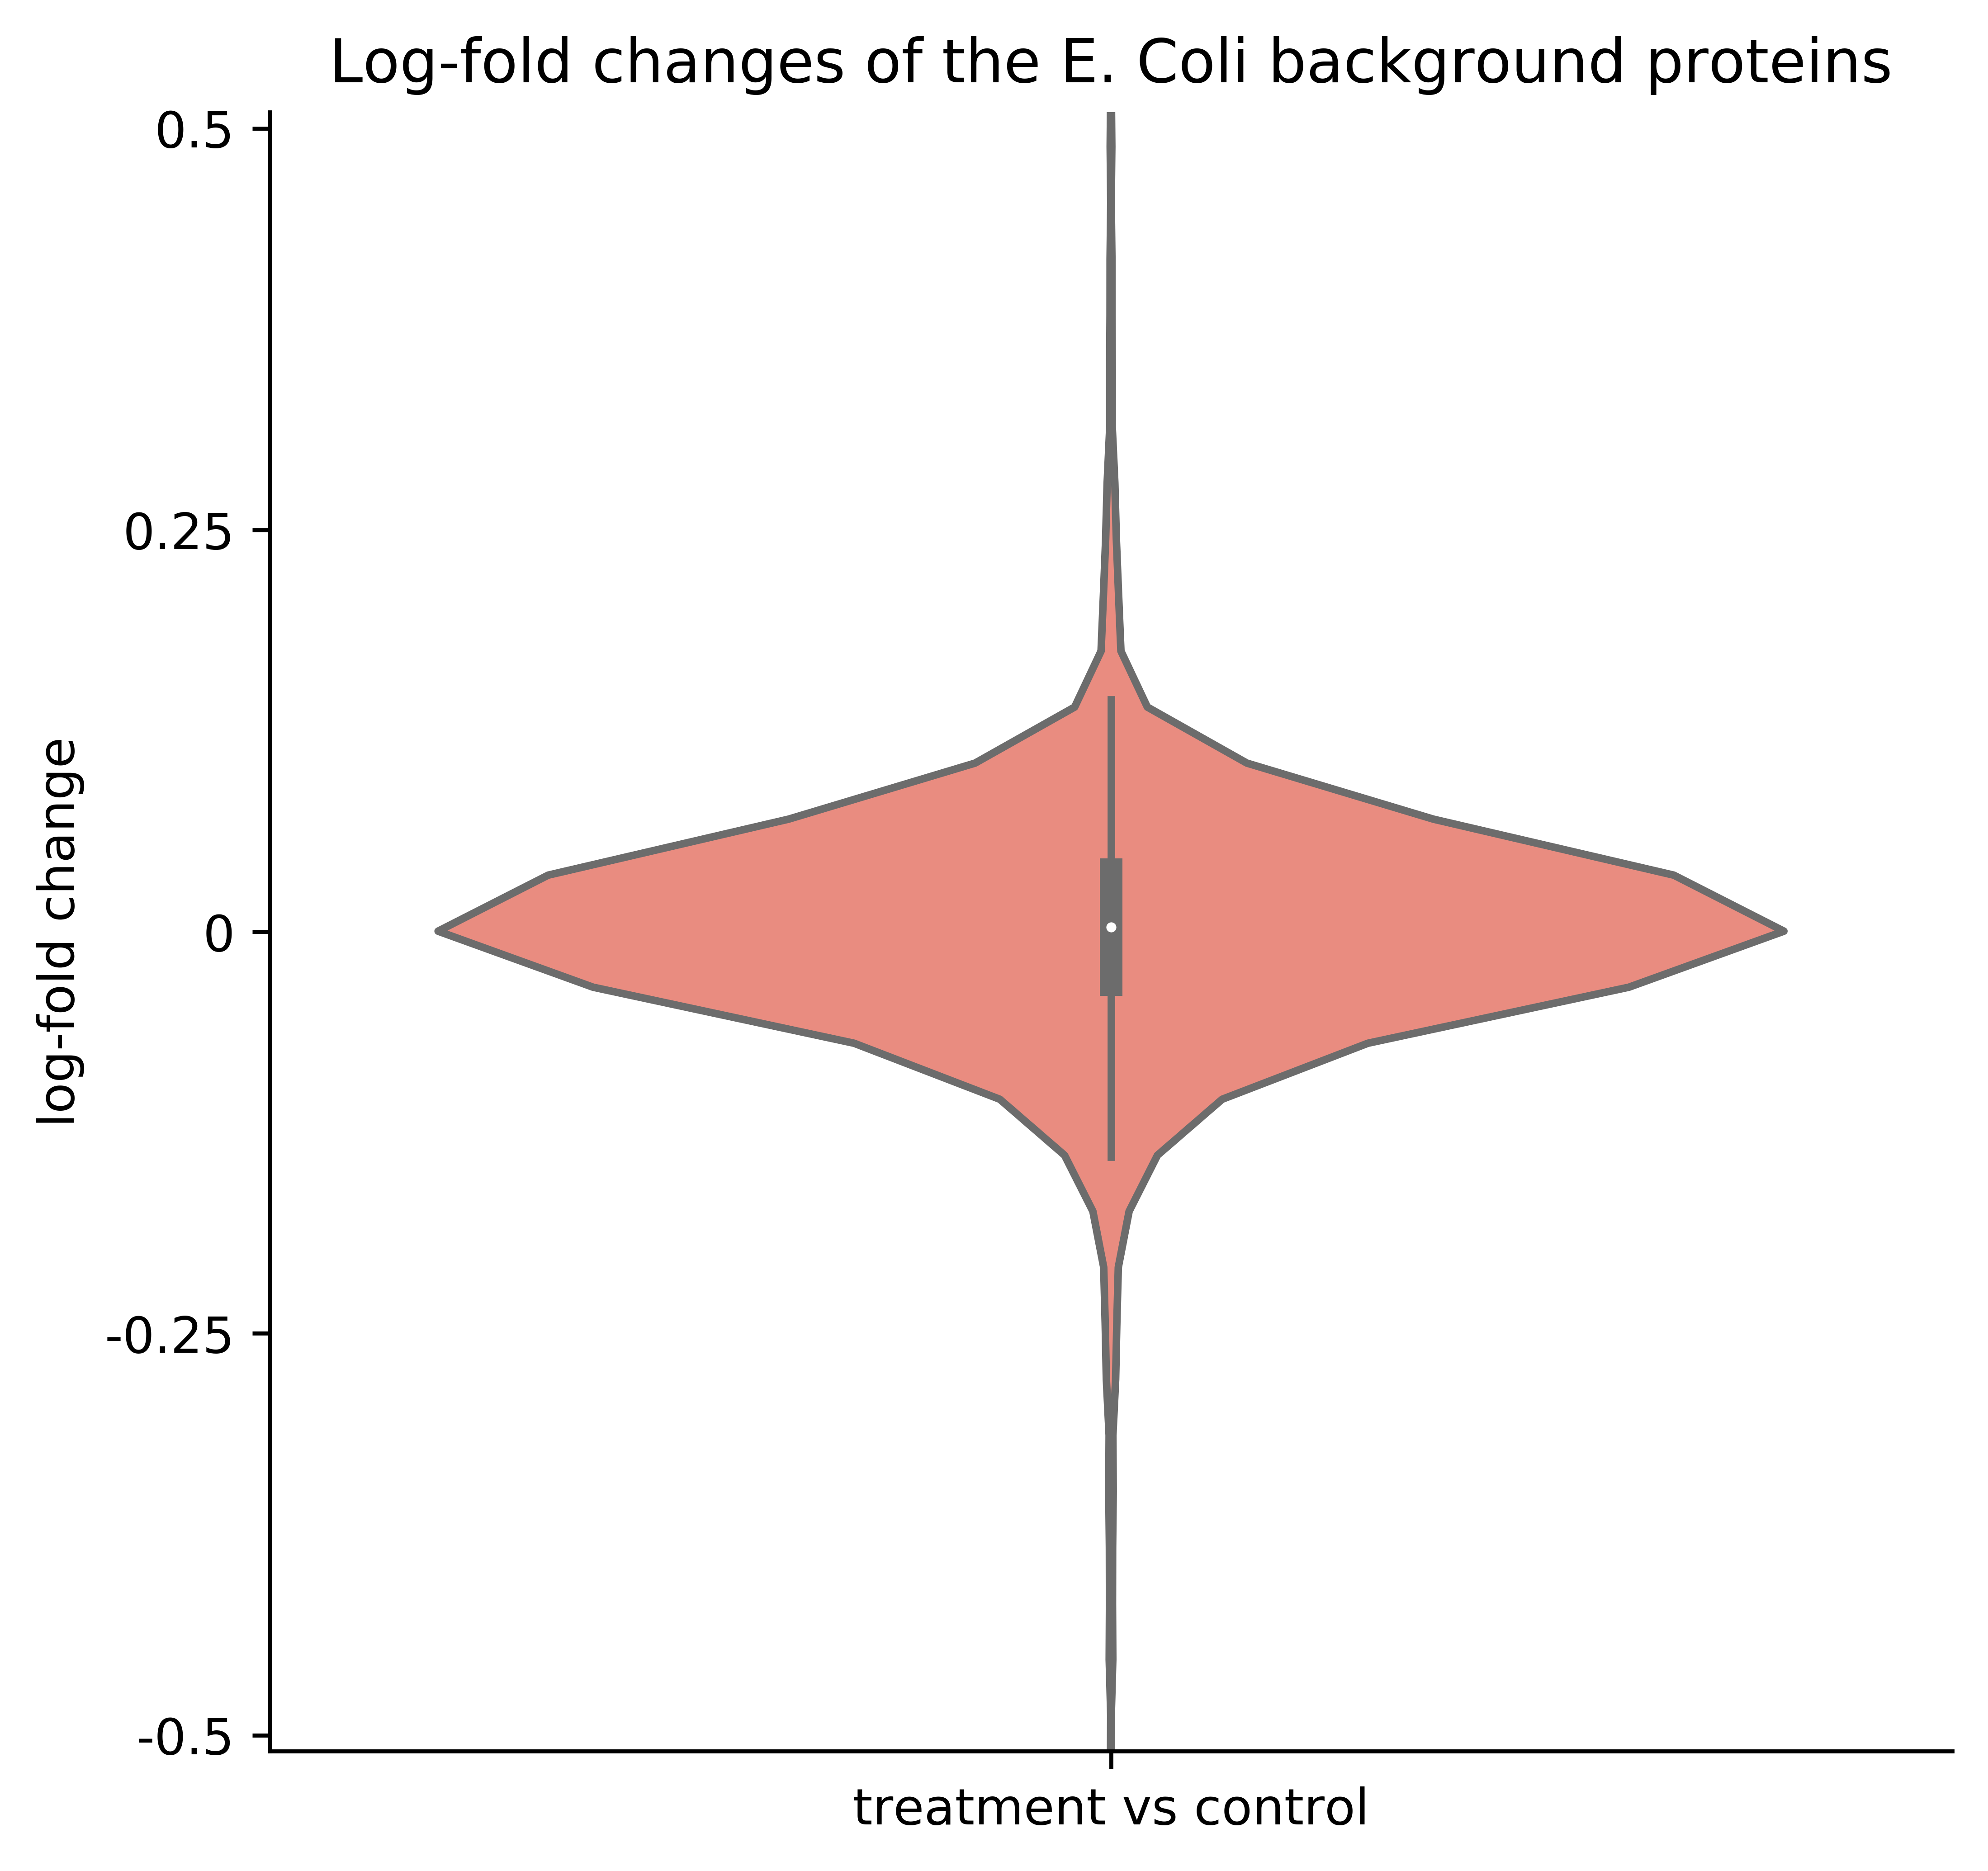

In [91]:
import seaborn as sns

viodata = pd.read_csv("./viodata.csv", sep=",", header=0)
fig, ax = plt.subplots(figsize=(6,6),dpi=800)

plt.yticks([-0.5, -0.25, 0, 0.25, 0.5], ["-0.5", "-0.25", "0", "0.25", "0.5"])

plt.ylim(-0.51, 0.51)
g = sns.violinplot(x=viodata["Label"],y=viodata["log2FC"],scale="count",color="#FA7F6F")
plt.title("Log-fold changes of the E. Coli background proteins")
ax.set_ylabel("log-fold change")
ax.set_xlabel("")
sns.despine()

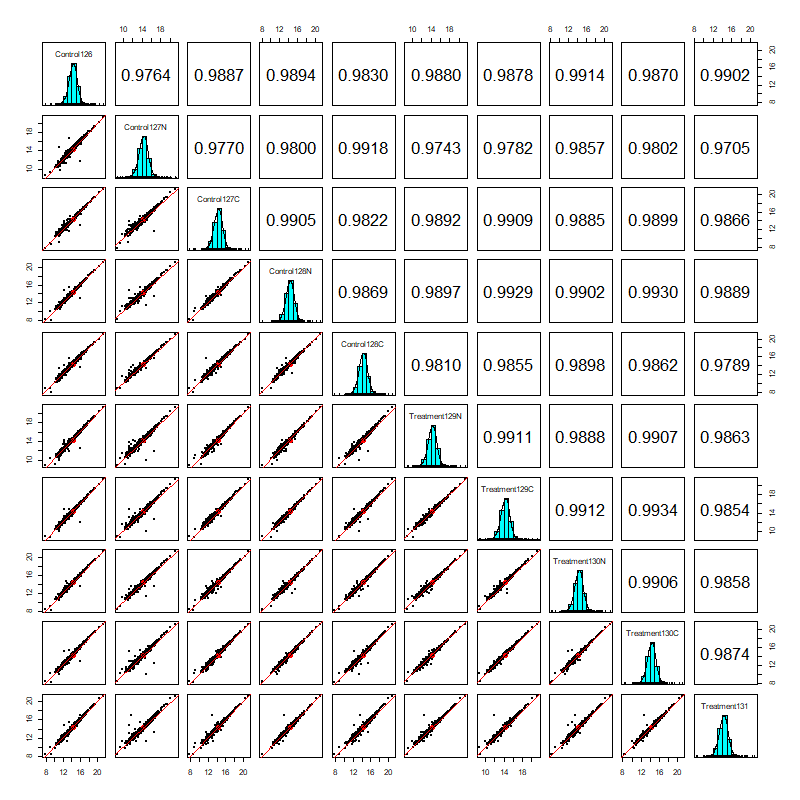

In [71]:
%%R -w 800 -h 800
library("dplyr") 
library("psych")

protfile = './ProteinLevelData.csv'
prot_data = read.csv(protfile, header = TRUE, sep = ',')

# spiked proteins
spiked.proteins <- c("ENO1" = "sp|P06733|ENOA_HUMAN", "ARG1" = "sp|P05089|ARGI1_HUMAN", "FABP4" = "P15090", "PTGES3" = "sp|P15090|FABP4_HUMAN", "KPNA2" = "P52292", 
                     "LASP1" = "sp|Q14847|LASP1_HUMAN", "HDAC3"= "sp|O15379|HDAC3_HUMAN", "KCNIP3" = "sp|Q9Y2W7|CSEN_HUMAN", "OTUB1" = "sp|Q96FW1|OTUB1_HUMAN", "GABARAPL1" = "sp|Q9H0R8|GBRL1_HUMAN",
                     "GAS7" = "sp|O60861|GAS7_HUMAN", "EZR" = "sp|P15311|EZRI_HUMAN", "Alb" = "sp|P02769|ALBU_BOVIN")

background = prot_data[!prot_data$Protein %in% as.character(spiked.proteins),]

pair_T = data.frame()
C1 <- subset(background, Channel=='1', select=c('Protein','Abundance'))
C2 <- subset(background, Channel=='2', select=c('Protein','Abundance'))
C3  <- subset(background, Channel=='3', select=c('Protein','Abundance'))
C4<- subset(background, Channel=='4', select=c('Protein','Abundance'))
C5 <- subset(background, Channel=='5', select=c('Protein','Abundance'))
C6 <- subset(background, Channel=='6', select=c('Protein','Abundance'))
C7 <- subset(background, Channel=='7', select=c('Protein','Abundance'))
C8 <- subset(background, Channel=='8', select=c('Protein','Abundance'))
C9 <- subset(background, Channel=='9', select=c('Protein','Abundance'))
C10 <- subset(background, Channel=='10', select=c('Protein','Abundance'))
pair_T = full_join(C1, C2, by="Protein")
pair_T = full_join(pair_T, C3, by="Protein")
pair_T = full_join(pair_T, C4, by="Protein")
pair_T = full_join(pair_T, C5, by="Protein")
pair_T = full_join(pair_T, C6, by="Protein")
pair_T = full_join(pair_T, C7, by="Protein")
pair_T = full_join(pair_T, C8, by="Protein")
pair_T = full_join(pair_T, C9, by="Protein")
pair_T = full_join(pair_T, C10, by="Protein")

colnames(pair_T) <- c('Protein','Control126', 'Control127N', 'Control127C',"Control128N" , 'Control128C','Treatment129N', 'Treatment129C', 'Treatment130N','Treatment130C', 'Treatment131')
pairs.panels(pair_T[,2:11], lm = TRUE, digits=4)


#### Similar to theoriginal study, we assigned thefirstfive channels to onetreatment group, and the secondfive channels to the secondgroup. As expected, no proteins were identified as beingsignificantly regulated. The estimated log-fold changes of theE.colibackground proteins were all close to 0.

In [72]:
%%R

input.om$Condition = data.frame(input.om)%>%select(Condition)%>%
    mutate(Condition=case_when(input.om$Condition == "control|1|0|0|1|0|40|1|2|2|0|40|4|21"~"control",
        input.om$Condition == "control|4|20|0|0|1|0|20|0|1|40|2|2|64"~"control",
        input.om$Condition == "control|40|0|2|4|4||4|4|1|2|2|20|1"~"control",
        input.om$Condition == "control|1|4|40|1|1|1|0|1|40|1|0|1|79"~"control",
        input.om$Condition == "control|4|2|4|40|2|2|4|20|1|4|4|0|81"~"control",
        input.om$Condition == "treatment|0|2|4|20|4|2|2|4|2|2|4|40|5"~"treatment",
        input.om$Condition == "treatment|20|1|1|0|40|1|2|0|20|0|1|1|0"~"treatment",
        input.om$Condition == "treatment|2|40|1|2|0|20|0|2|0|1|20|4|32"~"treatment",
        input.om$Condition == "treatment|0|1|20|2|2|0|1|40|0|20|1|0|85"~"treatment",
        input.om$Condition == "treatment|2|4|2|4|20|4|40|4|4|4|0|2|12"~"treatment"))



quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

levels(quant_om.msstats$ProteinLevelData$Condition)

INFO  [2021-12-14 10:13:36] ** MSstatsTMT - proteinSummarization function
INFO  [2021-12-14 10:13:39] Summarizing for Run : 1_1_1 ( 1  of  1 )
  |======================================================================| 100%
INFO  [2021-12-14 10:14:44] ** Protein-level summarization done by MSstats.
[1] "control"   "treatment"


In [73]:
%%R -w 1000 -h 600

TMT_Comp<-matrix(c(-1, 1), nrow=1)
row.names(TMT_Comp)<-c("treatment vs control")
colnames(TMT_Comp) = c("control","treatment")


TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

head(TMT_Comp.pairwise$ComparisonResult)
write.csv(TMT_Comp.pairwise$ComparisonResult, 'comparison_res.csv', row.names=FALSE,col.names=TRUE,sep=",")

INFO  [2021-12-14 10:14:44] Model fitting for 2391 proteins.
  |======================================================================| 100%
INFO  [2021-12-14 10:15:00] Testing for 2391 proteins:
  |======================================================================| 100%


In [6]:
%%R
library("vioplot")
library("ggplot2")

comp_res = read.csv('comparison_res.csv', header = TRUE, sep = ',')

myplot = ggplot(comp_res, aes(adj.pvalue)) +
  geom_histogram(bins = 100, fill= "#404080") + ggtitle("P-value distribution\nComparison") + theme(plot.title = element_text(hjust = 0.5))

ggsave(file="mygraph.png",plot=myplot,width=5,height=4, dpi=500)


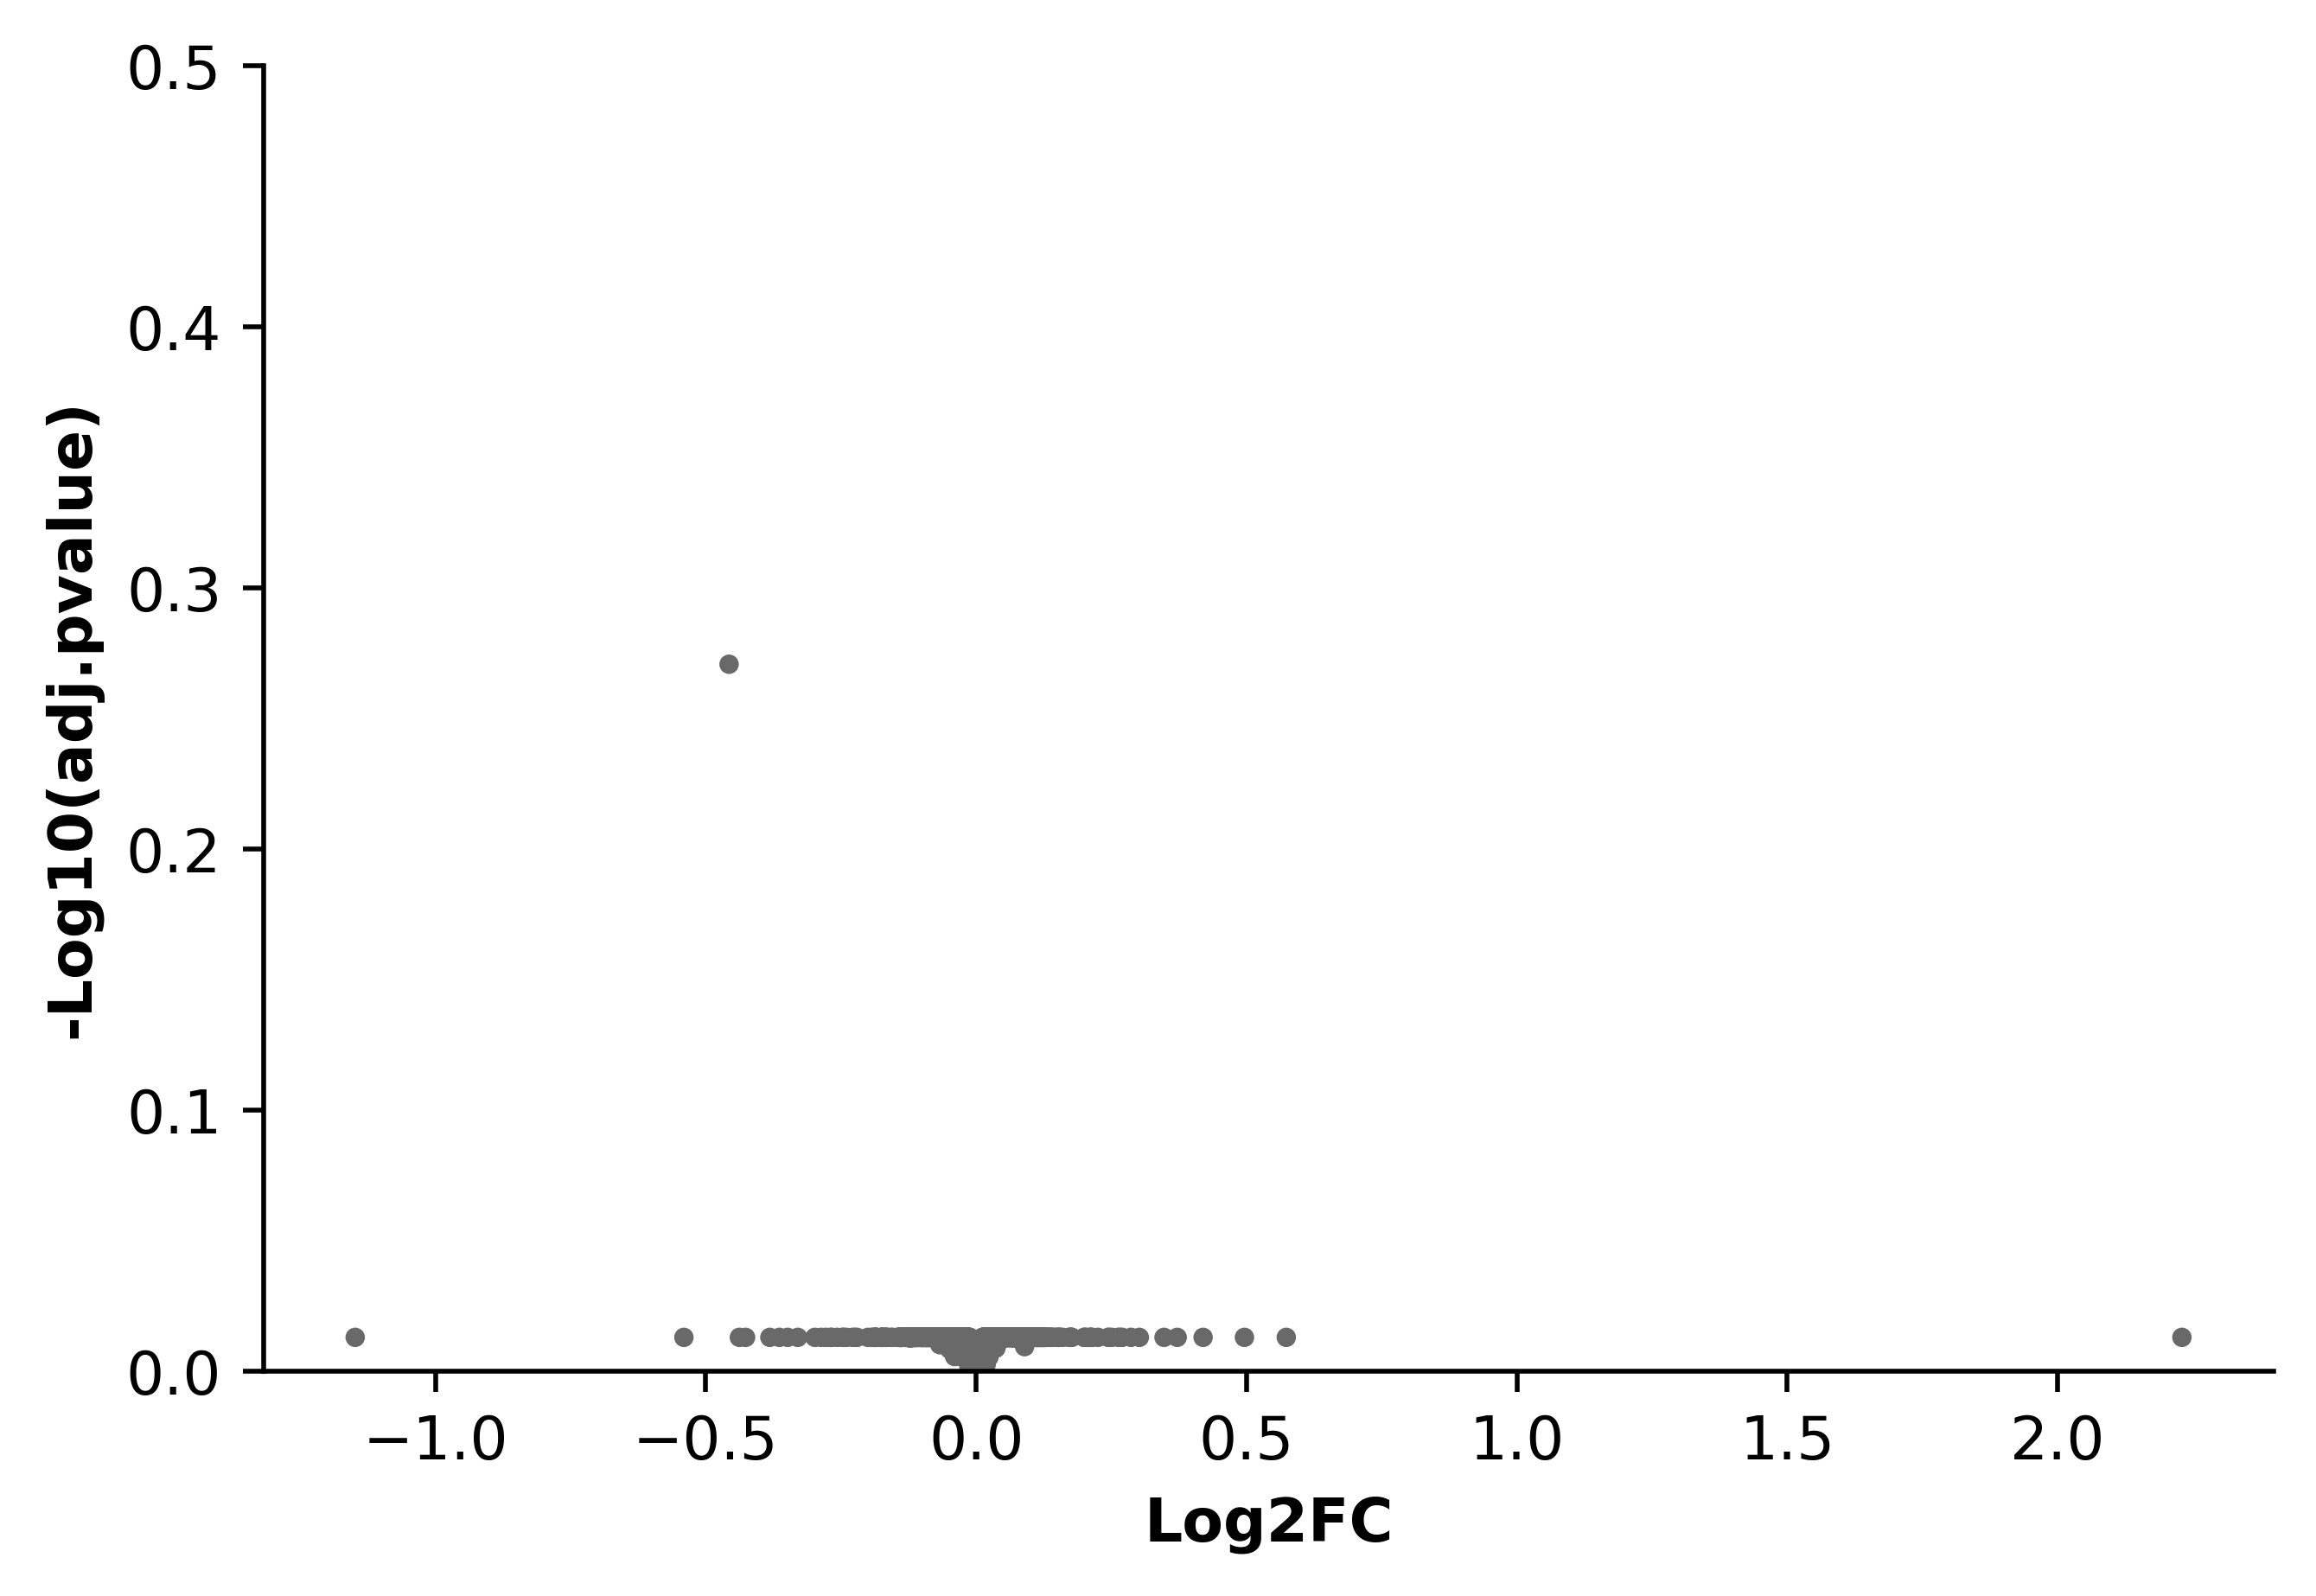

In [76]:
fig = plt.figure(dpi=500)
ax = fig.add_subplot(111)
data = pd.read_csv("comparison_res.csv", sep=",", header=0)
data = data[data['Protein'].str.contains("ECOLI")]
data["-Log10(adj.pvalue)"] = -np.log10(data['adj.pvalue'])
data.loc[data['adj.pvalue'] < 0.05,'group'] = 'tab:red' 
data.loc[data['adj.pvalue'] >= 0.05,'group'] = 'dimgrey'
ax.scatter(data['log2FC'], data["-Log10(adj.pvalue)"], s=5, c=data['group'])
ax.set_ylabel('-Log10(adj.pvalue)',fontweight='bold')
ax.set_xlabel('Log2FC',fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 0.5)
plt.show()

In [92]:
%%R
ENO1.om <- OpenMStoMSstatsTMTFormat(raw.om)
ENO1.om$Condition = data.frame(ENO1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=ENO1;QY=1 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=ENO1;QY=4 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=ENO1;QY=40 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=ENO1;QY=1 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=ENO1;QY=4 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=ENO1;QY=0 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=ENO1;QY=20 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=ENO1;QY=2 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=ENO1;QY=0 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=ENO1;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(ENO1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

TMT_Comp<-matrix(c(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c("CT=protein;AC=ENO1;QY=0 pmol", "CT=protein;AC=ENO1;QY=4 pmol", "CT=protein;AC=ENO1;QY=20 pmol", "CT=protein;AC=ENO1;QY=2 pmol", "CT=protein;AC=ENO1;QY=40 pmol", "CT=protein;AC=ENO1;QY=1 pmol")
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

ENO1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P06733|ENOA_HUMAN"]
ENO1FC

INFO  [2022-01-21 17:28:43] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 17:28:46] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 17:28:46] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 17:28:49] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 17:28:49] ** Shared peptides are removed.
INFO  [2022-01-21 17:28:49] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 17:29:28] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 17:29:34] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 17:29:34] ** Fractions belongin

In [93]:
%%R

ARGI1.om <- OpenMStoMSstatsTMTFormat(raw.om)
ARGI1.om$Condition = data.frame(ARGI1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=ARG1;QY=0 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=ARG1;QY=20 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=ARG1;QY=0 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=ARG1;QY=4 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=ARG1;QY=2 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=ARG1;QY=2 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=ARG1;QY=1 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=ARG1;QY=40 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=ARG1;QY=1 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=ARG1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(ARGI1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=ARG1;QY=2 pmol','CT=protein;AC=ARG1;QY=1 pmol','CT=protein;AC=ARG1;QY=40 pmol','CT=protein;AC=ARG1;QY=4 pmol','CT=protein;AC=ARG1;QY=0 pmol','CT=protein;AC=ARG1;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

ARG1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P05089|ARGI1_HUMAN"]
ARG1FC

INFO  [2022-01-21 17:39:06] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 17:39:08] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 17:39:08] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 17:39:08] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 17:39:09] ** Shared peptides are removed.
INFO  [2022-01-21 17:39:09] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 17:39:48] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 17:39:53] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 17:39:53] ** Fractions belongin

In [94]:
%%R

FABP4.om <- OpenMStoMSstatsTMTFormat(raw.om)
FABP4.om$Condition = data.frame(FABP4.om)%>%select(Condition)%>%
    mutate(Condition=case_when(FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=FABP4;QY=0 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=FABP4;QY=0 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=FABP4;QY=2 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=FABP4;QY=40 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=FABP4;QY=4 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=FABP4;QY=4 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=FABP4;QY=1 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=FABP4;QY=1 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=FABP4;QY=20 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=FABP4;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(FABP4.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=FABP4;QY=4 pmol','CT=protein;AC=FABP4;QY=1 pmol','CT=protein;AC=FABP4;QY=20 pmol','CT=protein;AC=FABP4;QY=2 pmol','CT=protein;AC=FABP4;QY=0 pmol','CT=protein;AC=FABP4;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
FABP4FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P15090|FABP4_HUMAN"]
FABP4FC

INFO  [2022-01-21 17:41:24] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 17:41:26] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 17:41:26] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 17:41:26] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 17:41:26] ** Shared peptides are removed.
INFO  [2022-01-21 17:41:27] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 17:42:03] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 17:42:09] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 17:42:09] ** Fractions belongin

In [95]:
%%R

TEBP.om <- OpenMStoMSstatsTMTFormat(raw.om)
TEBP.om$Condition = data.frame(TEBP.om)%>%select(Condition)%>%
    mutate(Condition=case_when(TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=PTGES3;QY=1 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=PTGES3;QY=0 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=PTGES3;QY=4 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=PTGES3;QY=1 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=PTGES3;QY=40 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=PTGES3;QY=20 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=PTGES3;QY=0 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=PTGES3;QY=2 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=PTGES3;QY=2 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=PTGES3;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(TEBP.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=PTGES3;QY=20 pmol','CT=protein;AC=PTGES3;QY=40 pmol','CT=protein;AC=PTGES3;QY=0 pmol','CT=protein;AC=PTGES3;QY=2 pmol','CT=protein;AC=PTGES3;QY=4 pmol','CT=protein;AC=PTGES3;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
TEBPFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q15185|TEBP_HUMAN"]
TEBPFC

INFO  [2022-01-21 17:43:36] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 17:43:38] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 17:43:38] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 17:43:38] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 17:43:38] ** Shared peptides are removed.
INFO  [2022-01-21 17:43:38] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 17:44:16] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 17:44:21] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 17:44:21] ** Fractions belongin

In [96]:
%%R

IMA1.om <- OpenMStoMSstatsTMTFormat(raw.om)
IMA1.om$Condition = data.frame(IMA1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=KPNA2;QY=0 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=KPNA2;QY=1 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=KPNA2;QY=4 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=KPNA2;QY=1 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=KPNA2;QY=2 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=KPNA2;QY=4 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=KPNA2;QY=40 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=KPNA2;QY=0 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=KPNA2;QY=2 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=KPNA2;QY=20 pmol"))

quant_om.msstats <- proteinSummarization(IMA1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=KPNA2;QY=4 pmol','CT=protein;AC=KPNA2;QY=2 pmol','CT=protein;AC=KPNA2;QY=40 pmol','CT=protein;AC=KPNA2;QY=0 pmol','CT=protein;AC=KPNA2;QY=20 pmol','CT=protein;AC=KPNA2;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
IMA1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P52292|IMA1_HUMAN"]
IMA1FC


INFO  [2022-01-21 17:45:49] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 17:45:51] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 17:45:51] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 17:45:51] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 17:45:52] ** Shared peptides are removed.
INFO  [2022-01-21 17:45:52] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 17:46:31] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 17:46:36] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 17:46:36] ** Fractions belongin

In [97]:
%%R

LASP1.om <- OpenMStoMSstatsTMTFormat(raw.om)
LASP1.om$Condition = data.frame(LASP1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=LASP1;QY=40 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=LASP1;QY=0 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=LASP1;QY=4 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=LASP1;QY=1 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=LASP1;QY=2 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=LASP1;QY=2 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=LASP1;QY=1 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=LASP1;QY=20 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=LASP1;QY=0 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=LASP1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(LASP1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=LASP1;QY=2 pmol','CT=protein;AC=LASP1;QY=1 pmol','CT=protein;AC=LASP1;QY=20 pmol','CT=protein;AC=LASP1;QY=0 pmol','CT=protein;AC=LASP1;QY=4 pmol','CT=protein;AC=LASP1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
LASP1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q14847|LASP1_HUMAN"]
LASP1FC

INFO  [2022-01-21 17:48:01] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 17:48:03] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 17:48:03] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 17:48:03] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 17:48:03] ** Shared peptides are removed.
INFO  [2022-01-21 17:48:04] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 17:48:41] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 17:48:46] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 17:48:46] ** Fractions belongin

In [98]:
%%R

HDAC3.om <- OpenMStoMSstatsTMTFormat(raw.om)
HDAC3.om$Condition = data.frame(HDAC3.om)%>%select(Condition)%>%
    mutate(Condition=case_when(HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=HDAC3;QY=1 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=HDAC3;QY=20 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=HDAC3;QY=4 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=HDAC3;QY=0 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=HDAC3;QY=4 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=HDAC3;QY=2 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=HDAC3;QY=2 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=HDAC3;QY=0 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=HDAC3;QY=1 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=HDAC3;QY=40 pmol"))

quant_om.msstats <- proteinSummarization(HDAC3.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=HDAC3;QY=2 pmol','CT=protein;AC=HDAC3;QY=4 pmol','CT=protein;AC=HDAC3;QY=0 pmol','CT=protein;AC=HDAC3;QY=1 pmol','CT=protein;AC=HDAC3;QY=40 pmol','CT=protein;AC=HDAC3;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
HDAC3FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|O15379|HDAC3_HUMAN"]
HDAC3FC

INFO  [2022-01-21 17:50:17] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 17:50:19] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 17:50:19] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 17:50:19] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 17:50:19] ** Shared peptides are removed.
INFO  [2022-01-21 17:50:19] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 17:50:59] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 17:51:05] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 17:51:05] ** Fractions belongin

In [99]:
%%R

CSEN.om <- OpenMStoMSstatsTMTFormat(raw.om)
CSEN.om$Condition = data.frame(CSEN.om)%>%select(Condition)%>%
    mutate(Condition=case_when(CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=KCNIP3;QY=2 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=KCNIP3;QY=0 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=KCNIP3;QY=1 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=KCNIP3;QY=1 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=KCNIP3;QY=20 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=KCNIP3;QY=4 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=KCNIP3;QY=0 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=KCNIP3;QY=2 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=KCNIP3;QY=40 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=KCNIP3;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(CSEN.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=KCNIP3;QY=4 pmol','CT=protein;AC=KCNIP3;QY=20 pmol','CT=protein;AC=KCNIP3;QY=0 pmol','CT=protein;AC=KCNIP3;QY=2 pmol','CT=protein;AC=KCNIP3;QY=40 pmol','CT=protein;AC=KCNIP3;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
CSENFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q9Y2W7|CSEN_HUMAN"]
CSENFC

INFO  [2022-01-21 17:52:30] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 17:52:32] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 17:52:32] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 17:52:33] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 17:52:33] ** Shared peptides are removed.
INFO  [2022-01-21 17:52:33] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 17:53:09] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 17:53:14] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 17:53:14] ** Fractions belongin

In [100]:
%%R

OTUB1.om <- OpenMStoMSstatsTMTFormat(raw.om)
OTUB1.om$Condition = data.frame(OTUB1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=OTUB1;QY=2 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=OTUB1;QY=1 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=OTUB1;QY=4 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=OTUB1;QY=40 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=OTUB1;QY=1 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=OTUB1;QY=2 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=OTUB1;QY=20 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=OTUB1;QY=0 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=OTUB1;QY=0 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=OTUB1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(OTUB1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=OTUB1;QY=2 pmol','CT=protein;AC=OTUB1;QY=1 pmol','CT=protein;AC=OTUB1;QY=20 pmol','CT=protein;AC=OTUB1;QY=0 pmol','CT=protein;AC=OTUB1;QY=4 pmol','CT=protein;AC=OTUB1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
OTUB1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q96FW1|OTUB1_HUMAN"]
OTUB1FC


INFO  [2022-01-21 17:54:40] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 17:54:42] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 17:54:42] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 17:54:43] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 17:54:43] ** Shared peptides are removed.
INFO  [2022-01-21 17:54:43] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 17:55:21] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 17:55:27] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 17:55:27] ** Fractions belongin

In [101]:
%%R

GBRL1.om <- OpenMStoMSstatsTMTFormat(raw.om)
GBRL1.om$Condition = data.frame(GBRL1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=GABARAPL1;QY=0 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=GABARAPL1;QY=40 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=GABARAPL1;QY=2 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=GABARAPL1;QY=1 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=GABARAPL1;QY=4 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=GABARAPL1;QY=2 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=GABARAPL1;QY=0 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=GABARAPL1;QY=1 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=GABARAPL1;QY=20 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=GABARAPL1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(GBRL1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=GABARAPL1;QY=2 pmol','CT=protein;AC=GABARAPL1;QY=4 pmol','CT=protein;AC=GABARAPL1;QY=0 pmol','CT=protein;AC=GABARAPL1;QY=1 pmol','CT=protein;AC=GABARAPL1;QY=20 pmol','CT=protein;AC=GABARAPL1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
GBRL1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q9H0R8|GBRL1_HUMAN"]
GBRL1FC

INFO  [2022-01-21 17:56:53] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 17:56:55] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 17:56:55] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 17:56:55] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 17:56:55] ** Shared peptides are removed.
INFO  [2022-01-21 17:56:56] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 17:57:33] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 17:57:38] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 17:57:38] ** Fractions belongin

In [102]:
%%R

GAS7.om <- OpenMStoMSstatsTMTFormat(raw.om)
GAS7.om$Condition = data.frame(GAS7.om)%>%select(Condition)%>%
    mutate(Condition=case_when(GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=GAS7;QY=40 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=GAS7;QY=2 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=GAS7;QY=2 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=GAS7;QY=0 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=GAS7;QY=4 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=GAS7;QY=4 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=GAS7;QY=1 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=GAS7;QY=20 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=GAS7;QY=1 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=GAS7;QY=0 pmol"))

quant_om.msstats <- proteinSummarization(GAS7.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=GAS7;QY=4 pmol','CT=protein;AC=GAS7;QY=1 pmol','CT=protein;AC=GAS7;QY=20 pmol','CT=protein;AC=GAS7;QY=0 pmol','CT=protein;AC=GAS7;QY=40 pmol','CT=protein;AC=GAS7;QY=2 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
GAS7FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|O60861|GAS7_HUMAN"]
GAS7FC

INFO  [2022-01-21 17:59:12] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 17:59:14] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 17:59:14] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 17:59:14] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 17:59:15] ** Shared peptides are removed.
INFO  [2022-01-21 17:59:15] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 17:59:50] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 17:59:55] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 17:59:55] ** Fractions belongin

In [103]:
%%R

EZRI.om <- OpenMStoMSstatsTMTFormat(raw.om)
EZRI.om$Condition = data.frame(EZRI.om)%>%select(Condition)%>%
    mutate(Condition=case_when(EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=EZR;QY=4 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=EZR;QY=2 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=EZR;QY=20 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=EZR;QY=1 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=EZR;QY=0 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=EZR;QY=40 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=EZR;QY=1 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=EZR;QY=4 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=EZR;QY=0 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=EZR;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(EZRI.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 0, 0, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=EZR;QY=40 pmol','CT=protein;AC=EZR;QY=0 pmol','CT=protein;AC=EZR;QY=1 pmol','CT=protein;AC=EZR;QY=4 pmol','CT=protein;AC=EZR;QY=2 pmol','CT=protein;AC=EZR;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
EZRIFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P15311|EZRI_HUMAN"]
EZRIFC

INFO  [2022-01-21 18:01:22] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 18:01:24] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 18:01:24] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 18:01:24] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 18:01:24] ** Shared peptides are removed.
INFO  [2022-01-21 18:01:25] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 18:02:03] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 18:02:08] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 18:02:08] ** Fractions belongin

In [104]:
%%R

CFC = rbind(ENO1FC, ARG1FC, FABP4FC, TEBPFC, IMA1FC, LASP1FC, HDAC3FC, CSENFC, OTUB1FC, GBRL1FC, GAS7FC, EZRIFC)

FC2Column = c(round(sum(2^CFC[Label == "FC2"]$log2FC) / 12.0 - 2, 1), -0.6, -0.6, (sum((2^CFC[Label == "FC2"]$log2FC - 2)^2) / 12)^0.5, 1, 1)
FC4Column = c(round(sum(2^CFC[Label == "FC4"]$log2FC) / 12.0 - 4, 1), -2, -1.8, (sum((2^CFC[Label == "FC4"]$log2FC - 4)^2) / 12)^0.5, 2.1, 1.9)
FC20Column = c(round(sum(2^CFC[Label == "FC20"]$log2FC) / 12.0 - 20, 1), -11.4, -11.7, (sum((2^CFC[Label == "FC20"]$log2FC - 20)^2) / 12)^0.5, 11.8, 11.2)
FC40Column = c(round(sum(2^CFC[Label == "FC40"]$log2FC) / 12.0 - 40, 1), -22.7, -21.9, (sum((2^CFC[Label == "FC40"]$log2FC - 40)^2) / 12)^0.5, 23.5, 22.3)

ComRes = data.frame(FC2Column, FC4Column, FC20Column, FC40Column,
                   row.names = c("Bias(quantms)", "Bias(IsoProt)", "Bias(ref)", "RMSE(quantms)", "RMSE(IsoProt)", "RMSE(ref)"))
options(digits = 3)
names(ComRes) <- c("2", "4", "20", "40")
ComRes

                   2     4    20    40
Bias(quantms) -0.500 -1.80  -9.8 -19.3
Bias(IsoProt) -0.600 -2.00 -11.4 -22.7
Bias(ref)     -0.600 -1.80 -11.7 -21.9
RMSE(quantms)  0.557  1.84  10.1  19.8
RMSE(IsoProt)  1.000  2.10  11.8  23.5
RMSE(ref)      1.000  1.90  11.2  22.3


In [106]:
%%R

openms_output = './out_msstats.csv'
raw.om = read.csv(openms_output, header = TRUE, sep = ',')
raw.om = raw.om[!grepl("DECOY", raw.om$ProteinName),]
input.om <- OpenMStoMSstatsTMTFormat(raw.om)

input.om$Condition = data.frame(input.om)%>%select(Condition)%>%
    mutate(Condition=case_when(input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"1",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"4",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"40",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"1",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"4",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"0",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"20",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"2",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"0",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"2"))


# use MSstatsTMT for protein summarization
quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

INFO  [2022-01-21 21:03:17] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-21 21:03:19] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-21 21:03:19] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-21 21:03:20] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-21 21:03:20] ** Shared peptides are removed.
INFO  [2022-01-21 21:03:20] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-21 21:04:05] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-21 21:04:11] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-21 21:04:11] ** Fractions belongin

In [107]:
%%R

levels(quant_om.msstats$ProteinLevelData$Condition)

[1] "0"  "1"  "2"  "20" "4"  "40"


In [113]:
%%R

TMT_Comp<-matrix(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            -1, -1, -1, -1, 0, 0, 0, 0, 0, 0,
            1, 0, 0, 0, -1, -1, -1, 0, 0, 0,
            0, 1, 0, 0, 1, 0, 0, -1, 1, 0,
            0, 0, 1, 0, 0, 1, 0, 0, -1, -1,
            0, 0, 0, 1, 0, 0, 1, 1, 0, 1), nrow=10)
row.names(TMT_Comp)<-c("2vs1", "20vs1", "4vs1", "40vs1", "20vs2", "4vs2", "40vs2", "40vs20", "20vs4", "40vs4")
colnames(TMT_Comp) = c('0','1','2','20','4','40')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

INFO  [2022-01-22 11:47:00] Model fitting for 2391 proteins.
  |======================================================================| 100%
INFO  [2022-01-22 11:47:18] Testing for 2391 proteins:
  |======================================================================| 100%


In [114]:
%%R
all_non_spiked = TMT_Comp.pairwise$ComparisonResult[ grep("ENOA_HUMAN|ARGI1_HUMAN|FABP4_HUMAN|TEBP_HUMAN|IMA1_HUMAN|LASP1_HUAMN|HDAC3_HUMAN|CSEN_HUMAN|OTUB1_HUMAN|GBRL1_HUMAN|GAS7_HUMAN|EZRI_HUMAN|ALBU_BOVIN",TMT_Comp.pairwise$ComparisonResult$Protein, invert = TRUE), ]
write.csv(all_non_spiked, "./all_non_spiked.csv", sep=",", row.names=FALSE)

In [130]:
all_non_spiked = pd.read_csv("./all_non_spiked.csv", sep=",", header=0)
all_non_spiked = all_non_spiked.dropna(how="any", subset=["SE","DF", "pvalue","adj.pvalue"])
(2**all_non_spiked['log2FC'] - 1).abs().sum() / 23786

0.06678337422228249

In [139]:
np.sqrt((((2**all_non_spiked['log2FC'] - 1) ** 2).sum() / 23786))

0.24428594195714565

### Running with Proteus/Limma

In [140]:
import re
from collections import Counter

def clean_PeptideSequence(pep_seq):
    pattern = re.compile(r"\(.*?\)")
    pep_seq = pep_seq.replace(".", "")
    return pattern.sub("", pep_seq)

def modified_PeptideSequence(pep_seq):
    pattern = re.compile(r"\(.*?\)")
    t_pep_seq = pep_seq.replace(".", "").replace("Acetyl", "ac").replace("Carbamidomethyl", "ca").replace("Oxidation", "ox").replace("Deamidated", "de").replace("TMT6plex", "")
    t_pep_seq = "_" + t_pep_seq + "_"

def get_modifications(pep_seq):
    pattern = re.compile(r"\(.*?\)")
    t = ""
    modifications = re.findall(pattern, pep_seq)
    if len(modifications) == 0:
        return "Unmodified"
    c = Counter(modifications)
    for key, value in c.items():
        if value == 1:
            c[key] = ""
        else:
            c[key] = str(c[key]) + " "
    modifications = ",".join(set(modifications))
    if "(Acetyl)" in c:
        modifications = modifications.replace("(Acetyl)", c["(Acetyl)"] + "Acetyl (Protein N-term)")
    if "(Carbamidomethyl)" in c:
        modifications = modifications.replace("(Carbamidomethyl)", c["(Carbamidomethyl)"] + "Carbamidomethyl (C)")
    if "(Oxidation)" in c:
        modifications = modifications.replace("(Oxidation)", c["(Oxidation)"] + "Oxidation (M)")
    if "(Deamidated)" in c:
        modifications = modifications.replace("(Oxidation)", c["(Deamidated)"] + "Deamidation (NQ)")
        
    return modifications

quantms = pd.read_csv("./out_msstats.csv", sep=',', header=0)
quantms = quantms[-quantms['ProteinName'].str.contains("DECOY_")]
evi = pd.DataFrame(None, columns=['sequence', 'modified_sequence', 'protein_group', 'proteins',
                                  'protein', 'charge', 'reverse', 'contaminant', 'reporter_0', 'reporter_1', 'reporter_2',
                                 'reporter_3', 'reporter_4', 'reporter_5', 'reporter_6', 'reporter_7', 'reporter_8', 'reporter_9'])

for name, group in quantms.groupby(['PeptideSequence', 'ProteinName', 'Charge', 'Fraction']):
    reporter_0 = group[group['Channel'] == 1]['Intensity'].values[0] if 1 in list(group['Channel']) else ''
    reporter_1 = group[group['Channel'] == 2]['Intensity'].values[0] if 2 in list(group['Channel']) else ''
    reporter_2 = group[group['Channel'] == 3]['Intensity'].values[0] if 3 in list(group['Channel']) else ''
    reporter_3 = group[group['Channel'] == 4]['Intensity'].values[0] if 4 in list(group['Channel']) else ''
    reporter_4 = group[group['Channel'] == 5]['Intensity'].values[0] if 5 in list(group['Channel']) else ''
    reporter_5 = group[group['Channel'] == 6]['Intensity'].values[0] if 6 in list(group['Channel']) else ''
    reporter_6 = group[group['Channel'] == 7]['Intensity'].values[0] if 7 in list(group['Channel']) else ''
    reporter_7 = group[group['Channel'] == 8]['Intensity'].values[0] if 8 in list(group['Channel']) else ''
    reporter_8 = group[group['Channel'] == 9]['Intensity'].values[0] if 9 in list(group['Channel']) else ''
    reporter_9 = group[group['Channel'] == 10]['Intensity'].values[0] if 10 in list(group['Channel']) else ''
    
    evi = evi.append({'sequence': clean_PeptideSequence(name[0]), 'modified_sequence': modified_PeptideSequence(name[0]), 
               'protein_group': get_modifications(name[0]), 'proteins': name[1], 'protein': name[1], 'charge': name[2],
               'reverse': '', 'contaminant': '', 'reporter_0': reporter_0, 'reporter_1': reporter_1, 'reporter_2': reporter_2,
               'reporter_3': reporter_3, 'reporter_4': reporter_4, 'reporter_5': reporter_5, 'reporter_6': reporter_6,
               'reporter_7': reporter_7, 'reporter_8': reporter_8, 'reporter_9': reporter_9}, ignore_index=True)

In [141]:

evi.to_csv("evi.txt", sep='\t', index=False)

metadata = pd.DataFrame(None, columns=['measure', 'sample', 'condition', 'replicate'])
metadata['measure'] = ['Reporter intensity 0', 'Reporter intensity 1', 'Reporter intensity 2', 'Reporter intensity 3', 'Reporter intensity 4',
                      'Reporter intensity 5', 'Reporter intensity 6', 'Reporter intensity 7', 'Reporter intensity 8', 'Reporter intensity 9']

metadata['sample'] = ['c0_r1', 'c20_r1', 'c2_r1',
       'c0_r2', 'c2_r2', 'c1_r1', 'c4_r1',
       'c40_r1', 'c1_r2', 'c4_r2']
metadata['condition'] = ["c0", "c20", "c2", "c0", "c2", "c1", "c4", "c40", "c1", "c4"]
# metadata['replicate'] = [1, 2, 3, 1, 2, 3, 4, 1, 2, 3]
metadata.to_csv("metadata.txt", sep="\t", index=False)


In [50]:
%%R

library(proteusTMT)
library(proteus)
measCols <- paste0("Reporter intensity ", 0:9)
names(measCols) <- paste0("reporter_", 0:9)

evi = read.csv("evi.txt", sep="\t", header=TRUE)
meta = read.csv("metadata.txt", sep="\t", header=TRUE)
pepdat <- makePeptideTable(evi, meta, measure.cols=measCols, aggregate.fun=aggregateMedian, experiment.type="TMT")
summary(pepdat)


*** Basic statistics ***

  content = peptide
  experiment type = TMT
  number of samples = 10
  number of conditions = 6
  number of peptides = 27302
  samples = c0_r1, c20_r1, c2_r1, c0_r2, c2_r2, c1_r1, c4_r1, c40_r1, c1_r2, c4_r2
  conditions = c0, c1, c2, c20, c4, c40

*** Data processing ***

  evidence columns used = Reporter intensity 0, Reporter intensity 1, Reporter intensity 2, Reporter intensity 3, Reporter intensity 4, Reporter intensity 5, Reporter intensity 6, Reporter intensity 7, Reporter intensity 8, Reporter intensity 9
  sequence = 'Sequence'
  protein = 'Leading razor protein'
  normalization = identity


In [51]:
%%R

prodat <- makeProteinTable(pepdat)
head(prodat$tab)

                       c0_r1  c20_r1  c2_r1  c0_r2  c2_r2   c1_r1   c4_r1
sp|O15379|HDAC3_HUMAN  29334   36486  16577  26931 705444   23424  316802
sp|O60861|GAS7_HUMAN  145573   55510 666994  46795  26139 1340287   76497
sp|P00350|6PGD_ECOLI  908559 1026475 862801 972625 984227  838501 1051101
sp|P00363|FRDA_ECOLI  537405  515105 409967 535563 574435  458945  533108
sp|P00370|DHE4_ECOLI  356171  344731 346160 383816 403855  353508  406453
sp|P00393|NDH_ECOLI    86445   78044  83453  80224  83717   74297   86285
                       c40_r1  c1_r2  c4_r2
sp|O15379|HDAC3_HUMAN   67582  16353  55403
sp|O60861|GAS7_HUMAN   108997  19790 149429
sp|P00350|6PGD_ECOLI  1060021 922163 894705
sp|P00363|FRDA_ECOLI   575875 485967 472843
sp|P00370|DHE4_ECOLI   394527 350534 360885
sp|P00393|NDH_ECOLI     87782  80440  80646


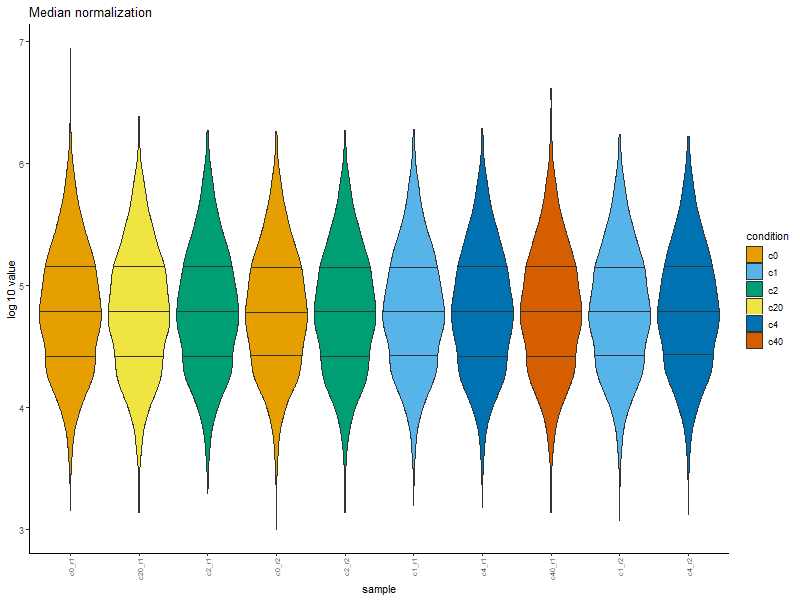

In [52]:
%%R -w 800 -h 600

prodat.med <- normalizeData(prodat)
plotSampleDistributions(prodat.med, title="Median normalization", fill="condition", method="violin")

In [53]:
%%R
library(limma) 
group_list <- factor(c("c0", "c20", "c2", "c0", "c2", "c1", "c4", "c40", "c1", "c4"))

design <- model.matrix(~0+factor(group_list))

colnames(design) <- levels(group_list) 
rownames(design) <- colnames(prodat.med$tab)
design

       c0 c1 c2 c20 c4 c40
c0_r1   1  0  0   0  0   0
c20_r1  0  0  0   1  0   0
c2_r1   0  0  1   0  0   0
c0_r2   1  0  0   0  0   0
c2_r2   0  0  1   0  0   0
c1_r1   0  1  0   0  0   0
c4_r1   0  0  0   0  1   0
c40_r1  0  0  0   0  0   1
c1_r2   0  1  0   0  0   0
c4_r2   0  0  0   0  1   0
attr(,"assign")
[1] 1 1 1 1 1 1
attr(,"contrasts")
attr(,"contrasts")$`factor(group_list)`
[1] "contr.treatment"



In [54]:
%%R

fit <- lmFit(prodat.med$tab, design)

cont.wt <- makeContrasts("c2-c1", "c20-c1", "c4-c1",
              "c40-c1",levels=design) 

fit2 <- contrasts.fit(fit, cont.wt) 

fit2 <- eBayes(fit2)

In [56]:
%%R


Labels = c("2vs1", "20vs1", "4vs1", "40vs1")

for(i in c(1:4)){
    tempout = topTable(fit2, coef=i, n=Inf)
    nrdep = na.omit(tempout)
    if(i ==1){
        final_res = nrdep
        final_res$Label = "2vs1"
    } else {
        nrdep$Label = Labels[i]
        final_res = rbind(final_res, nrdep)
    }
}

In [60]:
%%R

final_res["sp|P06733|ENOA_HUMAN",]

                     logFC AveExpr    t P.Value adj.P.Val    B Label
sp|P06733|ENOA_HUMAN 17388  274254 2.66  0.0454     0.995 -4.6  2vs1


#### #PEP/Prot > 1 and PSM/PEP > 1

In [5]:
newfilter_quantms = pd.DataFrame(None, columns=["RetentionTime", "ProteinName", "PeptideSequence", "Charge", "Channel", "Condition", "BioReplicate", "Run", "Mixture", "TechRepMixture", "Fraction", "Intensity", "Reference"])
t = pd.DataFrame(None, columns=["RetentionTime", "ProteinName", "PeptideSequence", "Charge", "Channel", "Condition", "BioReplicate", "Run", "Mixture", "TechRepMixture", "Fraction", "Intensity", "Reference"])
for peptide, pepgroup in quantms.groupby("PeptideSequence"):
    if len(set(pepgroup['ProteinName'])) > 1:
        print(peptide)
        continue
    if  len(set(pepgroup['Reference'])) > 1 :
        t = pd.concat([t, pepgroup])

for proteinName, group in t.groupby("ProteinName"):
    if  len(set(group['PeptideSequence'])) > 1 :
        newfilter_quantms = pd.concat([newfilter_quantms, group])

In [6]:
newfilter_quantms.to_csv("newfilter_quantms.csv", sep=",", index=False)
print(len(set(newfilter_quantms['ProteinName'])))

1087


In [8]:
%%R

library('MSstatsTMT', warn.conflicts = F, quietly = T, verbose = F)
library("dplyr")
raw.om = read.csv("newfilter_quantms.csv", header = TRUE, sep = ',')
raw.om = raw.om[!grepl("DECOY", raw.om$ProteinName),]
ENO1.om <- OpenMStoMSstatsTMTFormat(raw.om)
ENO1.om$Condition = data.frame(ENO1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=ENO1;QY=1 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=ENO1;QY=4 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=ENO1;QY=40 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=ENO1;QY=1 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=ENO1;QY=4 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=ENO1;QY=0 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=ENO1;QY=20 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=ENO1;QY=2 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=ENO1;QY=0 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=ENO1;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(ENO1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

TMT_Comp<-matrix(c(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c("CT=protein;AC=ENO1;QY=0 pmol", "CT=protein;AC=ENO1;QY=4 pmol", "CT=protein;AC=ENO1;QY=20 pmol", "CT=protein;AC=ENO1;QY=2 pmol", "CT=protein;AC=ENO1;QY=40 pmol", "CT=protein;AC=ENO1;QY=1 pmol")
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

ENO1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P06733|ENOA_HUMAN"]
ENO1FC

From cffi callback <function _consolewrite_ex at 0x0000024364EA9798>:
Traceback (most recent call last):
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd4 in position 1: invalid continuation byte
R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




INFO  [2022-01-23 20:22:40] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:22:41] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:22:42] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:22:42] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:22:42] ** Shared peptides are removed.
INFO  [2022-01-23 20:22:42] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:23:09] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:23:12] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:23:12] ** Fractions belongin

In [9]:
%%R

ARGI1.om <- OpenMStoMSstatsTMTFormat(raw.om)
ARGI1.om$Condition = data.frame(ARGI1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=ARG1;QY=0 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=ARG1;QY=20 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=ARG1;QY=0 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=ARG1;QY=4 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=ARG1;QY=2 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=ARG1;QY=2 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=ARG1;QY=1 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=ARG1;QY=40 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=ARG1;QY=1 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=ARG1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(ARGI1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=ARG1;QY=2 pmol','CT=protein;AC=ARG1;QY=1 pmol','CT=protein;AC=ARG1;QY=40 pmol','CT=protein;AC=ARG1;QY=4 pmol','CT=protein;AC=ARG1;QY=0 pmol','CT=protein;AC=ARG1;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

ARG1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P05089|ARGI1_HUMAN"]
ARG1FC

INFO  [2022-01-23 20:24:05] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:24:06] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:24:06] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:24:06] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:24:06] ** Shared peptides are removed.
INFO  [2022-01-23 20:24:06] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:24:33] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:24:36] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:24:36] ** Fractions belongin

In [10]:
%%R

FABP4.om <- OpenMStoMSstatsTMTFormat(raw.om)
FABP4.om$Condition = data.frame(FABP4.om)%>%select(Condition)%>%
    mutate(Condition=case_when(FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=FABP4;QY=0 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=FABP4;QY=0 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=FABP4;QY=2 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=FABP4;QY=40 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=FABP4;QY=4 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=FABP4;QY=4 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=FABP4;QY=1 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=FABP4;QY=1 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=FABP4;QY=20 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=FABP4;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(FABP4.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=FABP4;QY=4 pmol','CT=protein;AC=FABP4;QY=1 pmol','CT=protein;AC=FABP4;QY=20 pmol','CT=protein;AC=FABP4;QY=2 pmol','CT=protein;AC=FABP4;QY=0 pmol','CT=protein;AC=FABP4;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
FABP4FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P15090|FABP4_HUMAN"]
FABP4FC

INFO  [2022-01-23 20:25:02] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:25:03] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:25:03] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:25:03] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:25:03] ** Shared peptides are removed.
INFO  [2022-01-23 20:25:03] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:25:29] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:25:32] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:25:32] ** Fractions belongin

In [11]:
%%R

TEBP.om <- OpenMStoMSstatsTMTFormat(raw.om)
TEBP.om$Condition = data.frame(TEBP.om)%>%select(Condition)%>%
    mutate(Condition=case_when(TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=PTGES3;QY=1 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=PTGES3;QY=0 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=PTGES3;QY=4 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=PTGES3;QY=1 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=PTGES3;QY=40 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=PTGES3;QY=20 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=PTGES3;QY=0 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=PTGES3;QY=2 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=PTGES3;QY=2 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=PTGES3;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(TEBP.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=PTGES3;QY=20 pmol','CT=protein;AC=PTGES3;QY=40 pmol','CT=protein;AC=PTGES3;QY=0 pmol','CT=protein;AC=PTGES3;QY=2 pmol','CT=protein;AC=PTGES3;QY=4 pmol','CT=protein;AC=PTGES3;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
TEBPFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q15185|TEBP_HUMAN"]
TEBPFC

INFO  [2022-01-23 20:26:02] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:26:03] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:26:03] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:26:03] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:26:03] ** Shared peptides are removed.
INFO  [2022-01-23 20:26:04] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:26:30] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:26:33] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:26:33] ** Fractions belongin

In [12]:
%%R

IMA1.om <- OpenMStoMSstatsTMTFormat(raw.om)
IMA1.om$Condition = data.frame(IMA1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=KPNA2;QY=0 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=KPNA2;QY=1 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=KPNA2;QY=4 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=KPNA2;QY=1 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=KPNA2;QY=2 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=KPNA2;QY=4 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=KPNA2;QY=40 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=KPNA2;QY=0 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=KPNA2;QY=2 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=KPNA2;QY=20 pmol"))

quant_om.msstats <- proteinSummarization(IMA1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=KPNA2;QY=4 pmol','CT=protein;AC=KPNA2;QY=2 pmol','CT=protein;AC=KPNA2;QY=40 pmol','CT=protein;AC=KPNA2;QY=0 pmol','CT=protein;AC=KPNA2;QY=20 pmol','CT=protein;AC=KPNA2;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
IMA1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P52292|IMA1_HUMAN"]
IMA1FC

INFO  [2022-01-23 20:27:00] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:27:01] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:27:01] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:27:01] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:27:02] ** Shared peptides are removed.
INFO  [2022-01-23 20:27:02] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:27:27] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:27:30] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:27:30] ** Fractions belongin

In [13]:
%%R

LASP1.om <- OpenMStoMSstatsTMTFormat(raw.om)
LASP1.om$Condition = data.frame(LASP1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=LASP1;QY=40 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=LASP1;QY=0 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=LASP1;QY=4 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=LASP1;QY=1 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=LASP1;QY=2 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=LASP1;QY=2 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=LASP1;QY=1 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=LASP1;QY=20 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=LASP1;QY=0 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=LASP1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(LASP1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=LASP1;QY=2 pmol','CT=protein;AC=LASP1;QY=1 pmol','CT=protein;AC=LASP1;QY=20 pmol','CT=protein;AC=LASP1;QY=0 pmol','CT=protein;AC=LASP1;QY=4 pmol','CT=protein;AC=LASP1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
LASP1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q14847|LASP1_HUMAN"]
LASP1FC

INFO  [2022-01-23 20:27:59] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:28:00] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:28:01] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:28:01] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:28:01] ** Shared peptides are removed.
INFO  [2022-01-23 20:28:01] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:28:26] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:28:29] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:28:29] ** Fractions belongin

In [14]:
%%R

HDAC3.om <- OpenMStoMSstatsTMTFormat(raw.om)
HDAC3.om$Condition = data.frame(HDAC3.om)%>%select(Condition)%>%
    mutate(Condition=case_when(HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=HDAC3;QY=1 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=HDAC3;QY=20 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=HDAC3;QY=4 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=HDAC3;QY=0 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=HDAC3;QY=4 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=HDAC3;QY=2 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=HDAC3;QY=2 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=HDAC3;QY=0 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=HDAC3;QY=1 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=HDAC3;QY=40 pmol"))

quant_om.msstats <- proteinSummarization(HDAC3.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=HDAC3;QY=2 pmol','CT=protein;AC=HDAC3;QY=4 pmol','CT=protein;AC=HDAC3;QY=0 pmol','CT=protein;AC=HDAC3;QY=1 pmol','CT=protein;AC=HDAC3;QY=40 pmol','CT=protein;AC=HDAC3;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
HDAC3FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|O15379|HDAC3_HUMAN"]
HDAC3FC

INFO  [2022-01-23 20:28:55] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:28:56] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:28:57] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:28:57] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:28:57] ** Shared peptides are removed.
INFO  [2022-01-23 20:28:57] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:29:20] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:29:24] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:29:24] ** Fractions belongin

In [15]:
%%R

CSEN.om <- OpenMStoMSstatsTMTFormat(raw.om)
CSEN.om$Condition = data.frame(CSEN.om)%>%select(Condition)%>%
    mutate(Condition=case_when(CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=KCNIP3;QY=2 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=KCNIP3;QY=0 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=KCNIP3;QY=1 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=KCNIP3;QY=1 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=KCNIP3;QY=20 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=KCNIP3;QY=4 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=KCNIP3;QY=0 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=KCNIP3;QY=2 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=KCNIP3;QY=40 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=KCNIP3;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(CSEN.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=KCNIP3;QY=4 pmol','CT=protein;AC=KCNIP3;QY=20 pmol','CT=protein;AC=KCNIP3;QY=0 pmol','CT=protein;AC=KCNIP3;QY=2 pmol','CT=protein;AC=KCNIP3;QY=40 pmol','CT=protein;AC=KCNIP3;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
CSENFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q9Y2W7|CSEN_HUMAN"]
CSENFC

INFO  [2022-01-23 20:30:08] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:30:09] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:30:09] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:30:09] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:30:09] ** Shared peptides are removed.
INFO  [2022-01-23 20:30:09] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:30:34] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:30:37] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:30:37] ** Fractions belongin

In [16]:
%%R

OTUB1.om <- OpenMStoMSstatsTMTFormat(raw.om)
OTUB1.om$Condition = data.frame(OTUB1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=OTUB1;QY=2 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=OTUB1;QY=1 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=OTUB1;QY=4 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=OTUB1;QY=40 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=OTUB1;QY=1 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=OTUB1;QY=2 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=OTUB1;QY=20 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=OTUB1;QY=0 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=OTUB1;QY=0 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=OTUB1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(OTUB1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=OTUB1;QY=2 pmol','CT=protein;AC=OTUB1;QY=1 pmol','CT=protein;AC=OTUB1;QY=20 pmol','CT=protein;AC=OTUB1;QY=0 pmol','CT=protein;AC=OTUB1;QY=4 pmol','CT=protein;AC=OTUB1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
OTUB1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q96FW1|OTUB1_HUMAN"]
OTUB1FC

INFO  [2022-01-23 20:31:02] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:31:03] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:31:03] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:31:04] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:31:04] ** Shared peptides are removed.
INFO  [2022-01-23 20:31:04] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:31:27] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:31:30] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:31:30] ** Fractions belongin

In [17]:
%%R

GBRL1.om <- OpenMStoMSstatsTMTFormat(raw.om)
GBRL1.om$Condition = data.frame(GBRL1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=GABARAPL1;QY=0 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=GABARAPL1;QY=40 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=GABARAPL1;QY=2 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=GABARAPL1;QY=1 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=GABARAPL1;QY=4 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=GABARAPL1;QY=2 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=GABARAPL1;QY=0 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=GABARAPL1;QY=1 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=GABARAPL1;QY=20 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=GABARAPL1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(GBRL1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=GABARAPL1;QY=2 pmol','CT=protein;AC=GABARAPL1;QY=4 pmol','CT=protein;AC=GABARAPL1;QY=0 pmol','CT=protein;AC=GABARAPL1;QY=1 pmol','CT=protein;AC=GABARAPL1;QY=20 pmol','CT=protein;AC=GABARAPL1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
GBRL1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q9H0R8|GBRL1_HUMAN"]
GBRL1FC

INFO  [2022-01-23 20:31:55] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:31:57] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:31:57] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:31:57] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:31:57] ** Shared peptides are removed.
INFO  [2022-01-23 20:31:57] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:32:21] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:32:24] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:32:24] ** Fractions belongin

In [18]:
%%R

GAS7.om <- OpenMStoMSstatsTMTFormat(raw.om)
GAS7.om$Condition = data.frame(GAS7.om)%>%select(Condition)%>%
    mutate(Condition=case_when(GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=GAS7;QY=40 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=GAS7;QY=2 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=GAS7;QY=2 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=GAS7;QY=0 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=GAS7;QY=4 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=GAS7;QY=4 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=GAS7;QY=1 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=GAS7;QY=20 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=GAS7;QY=1 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=GAS7;QY=0 pmol"))

quant_om.msstats <- proteinSummarization(GAS7.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=GAS7;QY=4 pmol','CT=protein;AC=GAS7;QY=1 pmol','CT=protein;AC=GAS7;QY=20 pmol','CT=protein;AC=GAS7;QY=0 pmol','CT=protein;AC=GAS7;QY=40 pmol','CT=protein;AC=GAS7;QY=2 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
GAS7FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|O60861|GAS7_HUMAN"]
GAS7FC

INFO  [2022-01-23 20:32:50] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:32:51] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:32:51] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:32:51] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:32:51] ** Shared peptides are removed.
INFO  [2022-01-23 20:32:51] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:33:14] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:33:17] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:33:18] ** Fractions belongin

In [19]:
%%R

EZRI.om <- OpenMStoMSstatsTMTFormat(raw.om)
EZRI.om$Condition = data.frame(EZRI.om)%>%select(Condition)%>%
    mutate(Condition=case_when(EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=EZR;QY=4 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=EZR;QY=2 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=EZR;QY=20 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=EZR;QY=1 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=EZR;QY=0 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=EZR;QY=40 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=EZR;QY=1 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=EZR;QY=4 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=EZR;QY=0 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=EZR;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(EZRI.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 0, 0, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=EZR;QY=40 pmol','CT=protein;AC=EZR;QY=0 pmol','CT=protein;AC=EZR;QY=1 pmol','CT=protein;AC=EZR;QY=4 pmol','CT=protein;AC=EZR;QY=2 pmol','CT=protein;AC=EZR;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
EZRIFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P15311|EZRI_HUMAN"]
EZRIFC

INFO  [2022-01-23 20:33:43] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:33:44] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:33:44] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:33:44] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:33:44] ** Shared peptides are removed.
INFO  [2022-01-23 20:33:44] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:34:08] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:34:12] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:34:12] ** Fractions belongin

In [20]:
%%R

CFC = rbind(ENO1FC, ARG1FC, FABP4FC, TEBPFC, IMA1FC, LASP1FC, HDAC3FC, CSENFC, OTUB1FC, GBRL1FC, GAS7FC, EZRIFC)

FC2Column = c(round(sum(2^CFC[Label == "FC2"]$log2FC) / 12.0 - 2, 1), -0.6, -0.6, (sum((2^CFC[Label == "FC2"]$log2FC - 2)^2) / 12)^0.5, 1, 1)
FC4Column = c(round(sum(2^CFC[Label == "FC4"]$log2FC) / 12.0 - 4, 1), -2, -1.8, (sum((2^CFC[Label == "FC4"]$log2FC - 4)^2) / 12)^0.5, 2.1, 1.9)
FC20Column = c(round(sum(2^CFC[Label == "FC20"]$log2FC) / 12.0 - 20, 1), -11.4, -11.7, (sum((2^CFC[Label == "FC20"]$log2FC - 20)^2) / 12)^0.5, 11.8, 11.2)
FC40Column = c(round(sum(2^CFC[Label == "FC40"]$log2FC) / 12.0 - 40, 1), -22.7, -21.9, (sum((2^CFC[Label == "FC40"]$log2FC - 40)^2) / 12)^0.5, 23.5, 22.3)

ComRes = data.frame(FC2Column, FC4Column, FC20Column, FC40Column,
                   row.names = c("Bias(quantms)", "Bias(IsoProt)", "Bias(ref)", "RMSE(quantms)", "RMSE(IsoProt)", "RMSE(ref)"))
options(digits = 3)
names(ComRes) <- c("2", "4", "20", "40")
ComRes

                   2     4     20    40
Bias(quantms) -0.400 -1.70  -9.00 -17.5
Bias(IsoProt) -0.600 -2.00 -11.40 -22.7
Bias(ref)     -0.600 -1.80 -11.70 -21.9
RMSE(quantms)  0.496  1.75   9.52  18.4
RMSE(IsoProt)  1.000  2.10  11.80  23.5
RMSE(ref)      1.000  1.90  11.20  22.3


#### non-spiked in proteins

In [21]:
%%R

input.om <- OpenMStoMSstatsTMTFormat(raw.om)

input.om$Condition = data.frame(input.om)%>%select(Condition)%>%
    mutate(Condition=case_when(input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"1",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"4",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"40",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"1",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"4",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"0",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"20",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"2",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"0",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"2"))


# use MSstatsTMT for protein summarization
quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

INFO  [2022-01-23 20:47:21] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 20:47:22] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 20:47:22] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 20:47:22] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 20:47:23] ** Shared peptides are removed.
INFO  [2022-01-23 20:47:23] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 20:47:52] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 20:47:55] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 20:47:55] ** Fractions belongin

In [22]:
%%R

levels(quant_om.msstats$ProteinLevelData$Condition)

[1] "0"  "1"  "2"  "20" "4"  "40"


In [23]:
%%R

TMT_Comp<-matrix(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            -1, -1, -1, -1, 0, 0, 0, 0, 0, 0,
            1, 0, 0, 0, -1, -1, -1, 0, 0, 0,
            0, 1, 0, 0, 1, 0, 0, -1, 1, 0,
            0, 0, 1, 0, 0, 1, 0, 0, -1, -1,
            0, 0, 0, 1, 0, 0, 1, 1, 0, 1), nrow=10)
row.names(TMT_Comp)<-c("2vs1", "20vs1", "4vs1", "40vs1", "20vs2", "4vs2", "40vs2", "40vs20", "20vs4", "40vs4")
colnames(TMT_Comp) = c('0','1','2','20','4','40')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
all_non_spiked = TMT_Comp.pairwise$ComparisonResult[ grep("ENOA_HUMAN|ARGI1_HUMAN|FABP4_HUMAN|TEBP_HUMAN|IMA1_HUMAN|LASP1_HUAMN|HDAC3_HUMAN|CSEN_HUMAN|OTUB1_HUMAN|GBRL1_HUMAN|GAS7_HUMAN|EZRI_HUMAN|ALBU_BOVIN",TMT_Comp.pairwise$ComparisonResult$Protein, invert = TRUE), ]
write.csv(all_non_spiked, "./all_non_spiked.csv", sep=",", row.names=FALSE)

INFO  [2022-01-23 20:50:05] Model fitting for 1087 proteins.
  |======================================================================| 100%
INFO  [2022-01-23 20:50:14] Testing for 1087 proteins:
  |======================================================================| 100%


In [24]:
all_non_spiked = pd.read_csv("./all_non_spiked.csv", sep=",", header=0)
all_non_spiked = all_non_spiked.dropna(how="any", subset=["SE","DF", "pvalue","adj.pvalue"])
(2**all_non_spiked['log2FC'] - 1).abs().sum() / 10750

0.06432967301272831

In [26]:
np.sqrt((((2**all_non_spiked['log2FC'] - 1) ** 2).sum() / 10750))

0.09765201691652782

#### #PEP/Prot > 2 and PSM/PEP > 1

In [27]:
newfilter2_quantms = pd.DataFrame(None, columns=["RetentionTime", "ProteinName", "PeptideSequence", "Charge", "Channel", "Condition", "BioReplicate", "Run", "Mixture", "TechRepMixture", "Fraction", "Intensity", "Reference"])
t = pd.DataFrame(None, columns=["RetentionTime", "ProteinName", "PeptideSequence", "Charge", "Channel", "Condition", "BioReplicate", "Run", "Mixture", "TechRepMixture", "Fraction", "Intensity", "Reference"])
for peptide, pepgroup in quantms.groupby("PeptideSequence"):
    if len(set(pepgroup['ProteinName'])) > 1:
        print(peptide)
        continue
    if  len(set(pepgroup['Reference'])) > 1 :
        t = pd.concat([t, pepgroup])

for proteinName, group in t.groupby("ProteinName"):
    if  len(set(group['PeptideSequence'])) > 2 :
        newfilter2_quantms = pd.concat([newfilter2_quantms, group])

In [30]:
print(len(set(newfilter2_quantms['ProteinName'])))
newfilter2_quantms.to_csv("newfilter2_quantms.csv", sep=",", index=False)

860


In [31]:
%%R

library('MSstatsTMT', warn.conflicts = F, quietly = T, verbose = F)
library("dplyr")
raw.om = read.csv("newfilter2_quantms.csv", header = TRUE, sep = ',')
raw.om = raw.om[!grepl("DECOY", raw.om$ProteinName),]
ENO1.om <- OpenMStoMSstatsTMTFormat(raw.om)
ENO1.om$Condition = data.frame(ENO1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=ENO1;QY=1 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=ENO1;QY=4 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=ENO1;QY=40 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=ENO1;QY=1 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=ENO1;QY=4 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=ENO1;QY=0 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=ENO1;QY=20 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=ENO1;QY=2 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=ENO1;QY=0 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=ENO1;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(ENO1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

TMT_Comp<-matrix(c(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c("CT=protein;AC=ENO1;QY=0 pmol", "CT=protein;AC=ENO1;QY=4 pmol", "CT=protein;AC=ENO1;QY=20 pmol", "CT=protein;AC=ENO1;QY=2 pmol", "CT=protein;AC=ENO1;QY=40 pmol", "CT=protein;AC=ENO1;QY=1 pmol")
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

ENO1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P06733|ENOA_HUMAN"]
ENO1FC

INFO  [2022-01-23 21:08:22] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:08:23] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:08:23] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:08:23] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:08:24] ** Shared peptides are removed.
INFO  [2022-01-23 21:08:24] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:08:50] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:08:54] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:08:54] ** Fractions belongin

In [33]:
%%R

ARGI1.om <- OpenMStoMSstatsTMTFormat(raw.om)
ARGI1.om$Condition = data.frame(ARGI1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=ARG1;QY=0 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=ARG1;QY=20 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=ARG1;QY=0 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=ARG1;QY=4 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=ARG1;QY=2 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=ARG1;QY=2 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=ARG1;QY=1 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=ARG1;QY=40 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=ARG1;QY=1 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=ARG1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(ARGI1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=ARG1;QY=2 pmol','CT=protein;AC=ARG1;QY=1 pmol','CT=protein;AC=ARG1;QY=40 pmol','CT=protein;AC=ARG1;QY=4 pmol','CT=protein;AC=ARG1;QY=0 pmol','CT=protein;AC=ARG1;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

ARG1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P05089|ARGI1_HUMAN"]
ARG1FC

INFO  [2022-01-23 21:10:30] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:10:31] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:10:31] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:10:31] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:10:32] ** Shared peptides are removed.
INFO  [2022-01-23 21:10:32] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:10:59] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:11:02] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:11:02] ** Fractions belongin

In [32]:
%%R

FABP4.om <- OpenMStoMSstatsTMTFormat(raw.om)
FABP4.om$Condition = data.frame(FABP4.om)%>%select(Condition)%>%
    mutate(Condition=case_when(FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=FABP4;QY=0 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=FABP4;QY=0 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=FABP4;QY=2 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=FABP4;QY=40 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=FABP4;QY=4 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=FABP4;QY=4 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=FABP4;QY=1 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=FABP4;QY=1 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=FABP4;QY=20 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=FABP4;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(FABP4.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=FABP4;QY=4 pmol','CT=protein;AC=FABP4;QY=1 pmol','CT=protein;AC=FABP4;QY=20 pmol','CT=protein;AC=FABP4;QY=2 pmol','CT=protein;AC=FABP4;QY=0 pmol','CT=protein;AC=FABP4;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
FABP4FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P15090|FABP4_HUMAN"]
FABP4FC

INFO  [2022-01-23 21:09:33] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:09:34] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:09:34] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:09:34] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:09:34] ** Shared peptides are removed.
INFO  [2022-01-23 21:09:34] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:10:01] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:10:04] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:10:04] ** Fractions belongin

In [34]:
%%R

TEBP.om <- OpenMStoMSstatsTMTFormat(raw.om)
TEBP.om$Condition = data.frame(TEBP.om)%>%select(Condition)%>%
    mutate(Condition=case_when(TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=PTGES3;QY=1 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=PTGES3;QY=0 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=PTGES3;QY=4 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=PTGES3;QY=1 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=PTGES3;QY=40 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=PTGES3;QY=20 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=PTGES3;QY=0 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=PTGES3;QY=2 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=PTGES3;QY=2 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=PTGES3;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(TEBP.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=PTGES3;QY=20 pmol','CT=protein;AC=PTGES3;QY=40 pmol','CT=protein;AC=PTGES3;QY=0 pmol','CT=protein;AC=PTGES3;QY=2 pmol','CT=protein;AC=PTGES3;QY=4 pmol','CT=protein;AC=PTGES3;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
TEBPFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q15185|TEBP_HUMAN"]
TEBPFC

INFO  [2022-01-23 21:11:27] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:11:28] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:11:29] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:11:29] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:11:29] ** Shared peptides are removed.
INFO  [2022-01-23 21:11:29] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:11:55] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:11:58] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:11:59] ** Fractions belongin

In [35]:
%%R

IMA1.om <- OpenMStoMSstatsTMTFormat(raw.om)
IMA1.om$Condition = data.frame(IMA1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=KPNA2;QY=0 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=KPNA2;QY=1 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=KPNA2;QY=4 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=KPNA2;QY=1 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=KPNA2;QY=2 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=KPNA2;QY=4 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=KPNA2;QY=40 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=KPNA2;QY=0 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=KPNA2;QY=2 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=KPNA2;QY=20 pmol"))

quant_om.msstats <- proteinSummarization(IMA1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=KPNA2;QY=4 pmol','CT=protein;AC=KPNA2;QY=2 pmol','CT=protein;AC=KPNA2;QY=40 pmol','CT=protein;AC=KPNA2;QY=0 pmol','CT=protein;AC=KPNA2;QY=20 pmol','CT=protein;AC=KPNA2;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
IMA1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P52292|IMA1_HUMAN"]
IMA1FC

INFO  [2022-01-23 21:12:22] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:12:23] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:12:23] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:12:24] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:12:24] ** Shared peptides are removed.
INFO  [2022-01-23 21:12:24] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:12:51] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:12:54] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:12:54] ** Fractions belongin

In [36]:
%%R

LASP1.om <- OpenMStoMSstatsTMTFormat(raw.om)
LASP1.om$Condition = data.frame(LASP1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=LASP1;QY=40 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=LASP1;QY=0 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=LASP1;QY=4 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=LASP1;QY=1 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=LASP1;QY=2 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=LASP1;QY=2 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=LASP1;QY=1 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=LASP1;QY=20 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=LASP1;QY=0 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=LASP1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(LASP1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=LASP1;QY=2 pmol','CT=protein;AC=LASP1;QY=1 pmol','CT=protein;AC=LASP1;QY=20 pmol','CT=protein;AC=LASP1;QY=0 pmol','CT=protein;AC=LASP1;QY=4 pmol','CT=protein;AC=LASP1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
LASP1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q14847|LASP1_HUMAN"]
LASP1FC

INFO  [2022-01-23 21:13:19] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:13:21] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:13:21] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:13:21] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:13:21] ** Shared peptides are removed.
INFO  [2022-01-23 21:13:21] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:13:47] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:13:51] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:13:51] ** Fractions belongin

In [37]:
%%R

HDAC3.om <- OpenMStoMSstatsTMTFormat(raw.om)
HDAC3.om$Condition = data.frame(HDAC3.om)%>%select(Condition)%>%
    mutate(Condition=case_when(HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=HDAC3;QY=1 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=HDAC3;QY=20 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=HDAC3;QY=4 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=HDAC3;QY=0 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=HDAC3;QY=4 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=HDAC3;QY=2 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=HDAC3;QY=2 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=HDAC3;QY=0 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=HDAC3;QY=1 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=HDAC3;QY=40 pmol"))

quant_om.msstats <- proteinSummarization(HDAC3.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=HDAC3;QY=2 pmol','CT=protein;AC=HDAC3;QY=4 pmol','CT=protein;AC=HDAC3;QY=0 pmol','CT=protein;AC=HDAC3;QY=1 pmol','CT=protein;AC=HDAC3;QY=40 pmol','CT=protein;AC=HDAC3;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
HDAC3FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|O15379|HDAC3_HUMAN"]
HDAC3FC

INFO  [2022-01-23 21:14:14] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:14:16] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:14:16] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:14:16] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:14:16] ** Shared peptides are removed.
INFO  [2022-01-23 21:14:16] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:14:40] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:14:43] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:14:43] ** Fractions belongin

In [38]:
%%R

CSEN.om <- OpenMStoMSstatsTMTFormat(raw.om)
CSEN.om$Condition = data.frame(CSEN.om)%>%select(Condition)%>%
    mutate(Condition=case_when(CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=KCNIP3;QY=2 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=KCNIP3;QY=0 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=KCNIP3;QY=1 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=KCNIP3;QY=1 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=KCNIP3;QY=20 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=KCNIP3;QY=4 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=KCNIP3;QY=0 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=KCNIP3;QY=2 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=KCNIP3;QY=40 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=KCNIP3;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(CSEN.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=KCNIP3;QY=4 pmol','CT=protein;AC=KCNIP3;QY=20 pmol','CT=protein;AC=KCNIP3;QY=0 pmol','CT=protein;AC=KCNIP3;QY=2 pmol','CT=protein;AC=KCNIP3;QY=40 pmol','CT=protein;AC=KCNIP3;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
CSENFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q9Y2W7|CSEN_HUMAN"]
CSENFC

INFO  [2022-01-23 21:15:05] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:15:06] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:15:06] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:15:06] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:15:06] ** Shared peptides are removed.
INFO  [2022-01-23 21:15:06] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:15:29] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:15:32] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:15:32] ** Fractions belongin

In [39]:
%%R

OTUB1.om <- OpenMStoMSstatsTMTFormat(raw.om)
OTUB1.om$Condition = data.frame(OTUB1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=OTUB1;QY=2 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=OTUB1;QY=1 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=OTUB1;QY=4 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=OTUB1;QY=40 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=OTUB1;QY=1 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=OTUB1;QY=2 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=OTUB1;QY=20 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=OTUB1;QY=0 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=OTUB1;QY=0 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=OTUB1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(OTUB1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=OTUB1;QY=2 pmol','CT=protein;AC=OTUB1;QY=1 pmol','CT=protein;AC=OTUB1;QY=20 pmol','CT=protein;AC=OTUB1;QY=0 pmol','CT=protein;AC=OTUB1;QY=4 pmol','CT=protein;AC=OTUB1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
OTUB1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q96FW1|OTUB1_HUMAN"]
OTUB1FC

INFO  [2022-01-23 21:15:54] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:15:55] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:15:55] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:15:55] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:15:55] ** Shared peptides are removed.
INFO  [2022-01-23 21:15:56] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:16:22] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:16:25] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:16:25] ** Fractions belongin

In [40]:
%%R

GBRL1.om <- OpenMStoMSstatsTMTFormat(raw.om)
GBRL1.om$Condition = data.frame(GBRL1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=GABARAPL1;QY=0 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=GABARAPL1;QY=40 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=GABARAPL1;QY=2 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=GABARAPL1;QY=1 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=GABARAPL1;QY=4 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=GABARAPL1;QY=2 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=GABARAPL1;QY=0 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=GABARAPL1;QY=1 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=GABARAPL1;QY=20 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=GABARAPL1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(GBRL1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=GABARAPL1;QY=2 pmol','CT=protein;AC=GABARAPL1;QY=4 pmol','CT=protein;AC=GABARAPL1;QY=0 pmol','CT=protein;AC=GABARAPL1;QY=1 pmol','CT=protein;AC=GABARAPL1;QY=20 pmol','CT=protein;AC=GABARAPL1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
GBRL1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q9H0R8|GBRL1_HUMAN"]
GBRL1FC

INFO  [2022-01-23 21:16:50] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:16:51] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:16:51] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:16:52] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:16:52] ** Shared peptides are removed.
INFO  [2022-01-23 21:16:52] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:17:17] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:17:20] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:17:20] ** Fractions belongin

In [41]:
%%R

GAS7.om <- OpenMStoMSstatsTMTFormat(raw.om)
GAS7.om$Condition = data.frame(GAS7.om)%>%select(Condition)%>%
    mutate(Condition=case_when(GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=GAS7;QY=40 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=GAS7;QY=2 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=GAS7;QY=2 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=GAS7;QY=0 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=GAS7;QY=4 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=GAS7;QY=4 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=GAS7;QY=1 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=GAS7;QY=20 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=GAS7;QY=1 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=GAS7;QY=0 pmol"))

quant_om.msstats <- proteinSummarization(GAS7.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=GAS7;QY=4 pmol','CT=protein;AC=GAS7;QY=1 pmol','CT=protein;AC=GAS7;QY=20 pmol','CT=protein;AC=GAS7;QY=0 pmol','CT=protein;AC=GAS7;QY=40 pmol','CT=protein;AC=GAS7;QY=2 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
GAS7FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|O60861|GAS7_HUMAN"]
GAS7FC

INFO  [2022-01-23 21:17:43] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:17:44] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:17:45] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:17:45] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:17:45] ** Shared peptides are removed.
INFO  [2022-01-23 21:17:45] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:18:08] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:18:11] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:18:11] ** Fractions belongin

In [42]:
%%R

EZRI.om <- OpenMStoMSstatsTMTFormat(raw.om)
EZRI.om$Condition = data.frame(EZRI.om)%>%select(Condition)%>%
    mutate(Condition=case_when(EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=EZR;QY=4 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=EZR;QY=2 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=EZR;QY=20 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=EZR;QY=1 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=EZR;QY=0 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=EZR;QY=40 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=EZR;QY=1 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=EZR;QY=4 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=EZR;QY=0 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=EZR;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(EZRI.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 0, 0, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=EZR;QY=40 pmol','CT=protein;AC=EZR;QY=0 pmol','CT=protein;AC=EZR;QY=1 pmol','CT=protein;AC=EZR;QY=4 pmol','CT=protein;AC=EZR;QY=2 pmol','CT=protein;AC=EZR;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
EZRIFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P15311|EZRI_HUMAN"]
EZRIFC

INFO  [2022-01-23 21:18:50] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:18:51] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:18:51] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:18:51] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:18:52] ** Shared peptides are removed.
INFO  [2022-01-23 21:18:52] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:19:18] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:19:21] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:19:21] ** Fractions belongin

In [43]:
%%R

CFC = rbind(ENO1FC, ARG1FC, FABP4FC, TEBPFC, IMA1FC, LASP1FC, HDAC3FC, CSENFC, OTUB1FC, GBRL1FC, GAS7FC, EZRIFC)

FC2Column = c(round(sum(2^CFC[Label == "FC2"]$log2FC) / 12.0 - 2, 1), -0.6, -0.6, (sum((2^CFC[Label == "FC2"]$log2FC - 2)^2) / 12)^0.5, 1, 1)
FC4Column = c(round(sum(2^CFC[Label == "FC4"]$log2FC) / 12.0 - 4, 1), -2, -1.8, (sum((2^CFC[Label == "FC4"]$log2FC - 4)^2) / 12)^0.5, 2.1, 1.9)
FC20Column = c(round(sum(2^CFC[Label == "FC20"]$log2FC) / 12.0 - 20, 1), -11.4, -11.7, (sum((2^CFC[Label == "FC20"]$log2FC - 20)^2) / 12)^0.5, 11.8, 11.2)
FC40Column = c(round(sum(2^CFC[Label == "FC40"]$log2FC) / 12.0 - 40, 1), -22.7, -21.9, (sum((2^CFC[Label == "FC40"]$log2FC - 40)^2) / 12)^0.5, 23.5, 22.3)

ComRes = data.frame(FC2Column, FC4Column, FC20Column, FC40Column,
                   row.names = c("Bias(quantms)", "Bias(IsoProt)", "Bias(ref)", "RMSE(quantms)", "RMSE(IsoProt)", "RMSE(ref)"))
options(digits = 3)
names(ComRes) <- c("2", "4", "20", "40")
ComRes

                   2     4     20    40
Bias(quantms) -0.400 -1.70  -9.00 -17.5
Bias(IsoProt) -0.600 -2.00 -11.40 -22.7
Bias(ref)     -0.600 -1.80 -11.70 -21.9
RMSE(quantms)  0.497  1.75   9.52  18.4
RMSE(IsoProt)  1.000  2.10  11.80  23.5
RMSE(ref)      1.000  1.90  11.20  22.3


#### non-spiked in proteins

In [44]:
%%R

input.om <- OpenMStoMSstatsTMTFormat(raw.om)

input.om$Condition = data.frame(input.om)%>%select(Condition)%>%
    mutate(Condition=case_when(input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"1",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"4",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"40",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"1",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"4",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"0",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"20",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"2",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"0",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"2"))


# use MSstatsTMT for protein summarization
quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

INFO  [2022-01-23 21:26:01] ** Raw data from OpenMS imported successfully.
INFO  [2022-01-23 21:26:02] ** Raw data from OpenMS cleaned successfully.
INFO  [2022-01-23 21:26:02] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2022-01-23 21:26:02] ** Features with all missing measurements across channels within each run are removed.
INFO  [2022-01-23 21:26:02] ** Shared peptides are removed.
INFO  [2022-01-23 21:26:02] ** Features with one or two measurements across channels within each run are removed.
INFO  [2022-01-23 21:26:33] ** PSMs have been aggregated to peptide ions.
INFO  [2022-01-23 21:26:36] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2022-01-23 21:26:36] ** Fractions belongin

In [45]:
%%R

levels(quant_om.msstats$ProteinLevelData$Condition)

[1] "0"  "1"  "2"  "20" "4"  "40"


In [46]:
%%R

TMT_Comp<-matrix(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            -1, -1, -1, -1, 0, 0, 0, 0, 0, 0,
            1, 0, 0, 0, -1, -1, -1, 0, 0, 0,
            0, 1, 0, 0, 1, 0, 0, -1, 1, 0,
            0, 0, 1, 0, 0, 1, 0, 0, -1, -1,
            0, 0, 0, 1, 0, 0, 1, 1, 0, 1), nrow=10)
row.names(TMT_Comp)<-c("2vs1", "20vs1", "4vs1", "40vs1", "20vs2", "4vs2", "40vs2", "40vs20", "20vs4", "40vs4")
colnames(TMT_Comp) = c('0','1','2','20','4','40')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
all_non_spiked = TMT_Comp.pairwise$ComparisonResult[ grep("ENOA_HUMAN|ARGI1_HUMAN|FABP4_HUMAN|TEBP_HUMAN|IMA1_HUMAN|LASP1_HUAMN|HDAC3_HUMAN|CSEN_HUMAN|OTUB1_HUMAN|GBRL1_HUMAN|GAS7_HUMAN|EZRI_HUMAN|ALBU_BOVIN",TMT_Comp.pairwise$ComparisonResult$Protein, invert = TRUE), ]
write.csv(all_non_spiked, "./all_non_spiked2.csv", sep=",", row.names=FALSE)

INFO  [2022-01-23 21:26:59] Model fitting for 860 proteins.
  |======================================================================| 100%
INFO  [2022-01-23 21:27:06] Testing for 860 proteins:
  |======================================================================| 100%


In [48]:
all_non_spiked = pd.read_csv("./all_non_spiked2.csv", sep=",", header=0)
all_non_spiked = all_non_spiked.dropna(how="any", subset=["SE","DF", "pvalue","adj.pvalue"])
(2**all_non_spiked['log2FC'] - 1).abs().sum() / 8480

0.05819429451704332

In [49]:
np.sqrt((((2**all_non_spiked['log2FC'] - 1) ** 2).sum() / 8480))

0.0886417978064353